## Kenar Desenini Kodla: 

### bwboundary ile label kenarlarını elde etme:

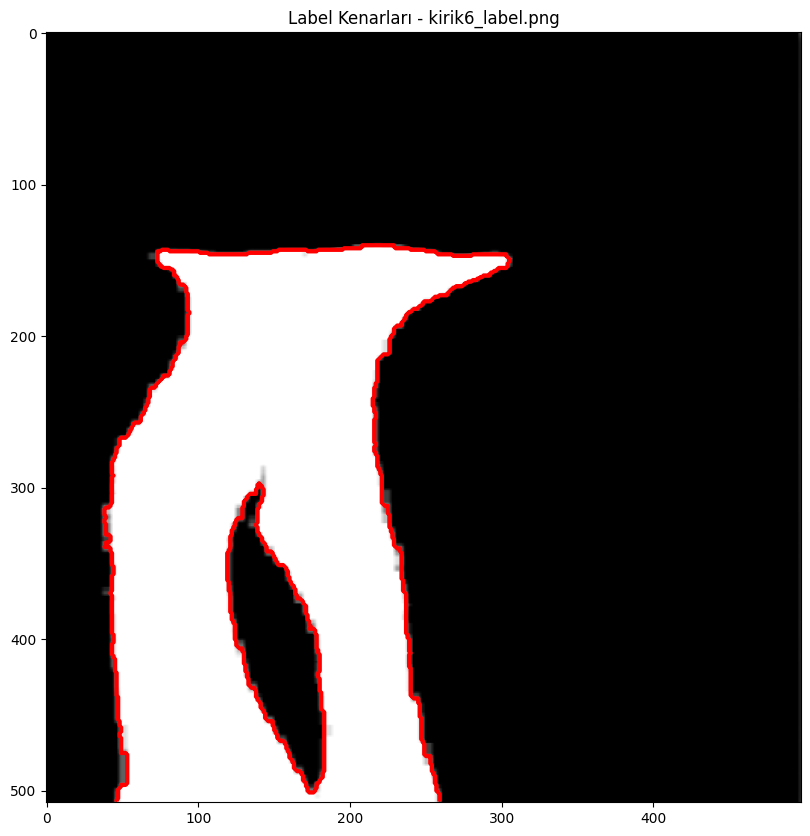

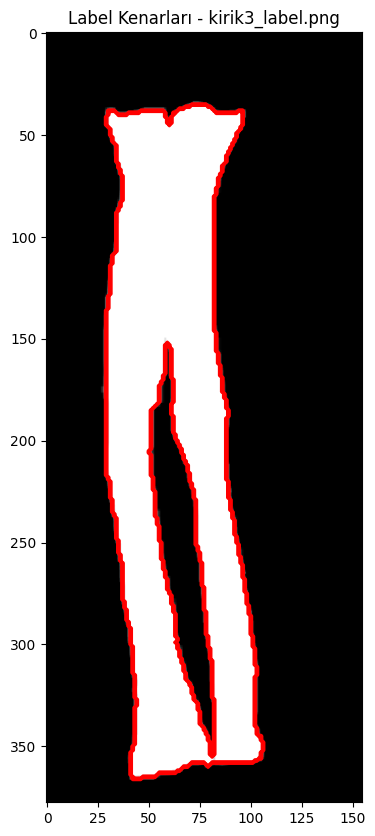

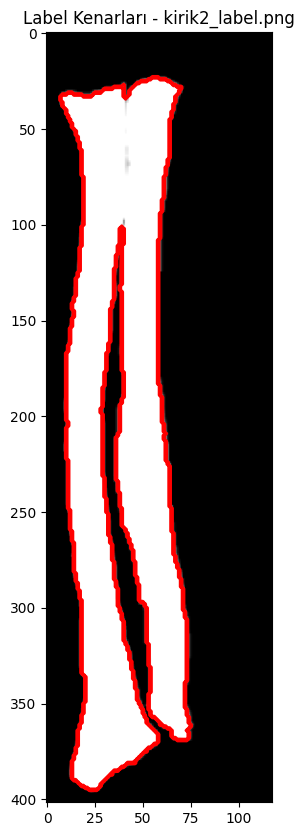

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, measure, morphology
import os  # Dosya adı alma için

# Label dosya yolları
label_paths = [
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png"
]

# Her bir label dosyasını işle
for label_path in label_paths:
    # Görseli yükle
    label_image = io.imread(label_path)

    # Eğer görsel RGBA (4 kanal) ise, sadece RGB kanallarını alıyoruz
    if label_image.ndim == 3 and label_image.shape[2] == 4:
        label_image = label_image[..., :3]  # RGBA'dan RGB'ye dönüşüm

    # Görseli gri tonlamaya çevir
    label_image = color.rgb2gray(label_image)  # RGB'yi gri tonlamaya çevir

    # Görseli binary formata çevir (organ kısmı 1, diğer her şey 0)
    binary_label_image = label_image > 0.5  # Organ kısmı 1 olacak, diğer her şey 0

    # bwboundary komutuyla etiket kenarlarını bulalım
    edges = morphology.binary_erosion(binary_label_image)  # Etiketteki organ kısmını erozyona uğratıyoruz
    edges = binary_label_image ^ edges  # Erozyona uğramamış alanı kenar olarak alıyoruz

    # Görseli gösterelim ve kenarları çizelim
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(label_image, cmap='gray')  # Tam görseli gri tonlamada göster

    # Kenarları kırmızıyla çizelim
    ax.contour(edges, colors='r', linewidths=2)

    # Görsel başlığını ekleyelim
    label_name = os.path.basename(label_path)  # Dosya adını doğru şekilde al
    ax.set_title(f"Label Kenarları - {label_name}")
    plt.show()


### Kenar Noktalarından Çizgiler Alma:

Bu kod, bir dizi tıbbi görüntü üzerinde kenar tespiti yaparak, çizilen çizgilerin etiketlerle ne kadar örtüştüğünü hesaplamak için kullanılır.

İlk olarak, verilen görsellerin boyutları, tüm görsellerin en büyük boyutuna göre yeniden boyutlandırılır. Ardından, her bir etiket görüntüsündeki kenarlar (konturlar) belirlenir ve bu kenarlardan belirli bir uzunlukta çizgiler çizilir. Çizilen çizgiler, etiket üzerinde organ bölgesine denk gelen alanlarla örtüşüp örtüşmediği açısından kontrol edilir.

Kodun sonunda, her bir görsel için çizilen çizgilerin etiketle ne kadar örtüştüğünü yüzde olarak hesaplar ve sonucu ekrana yazdırır.

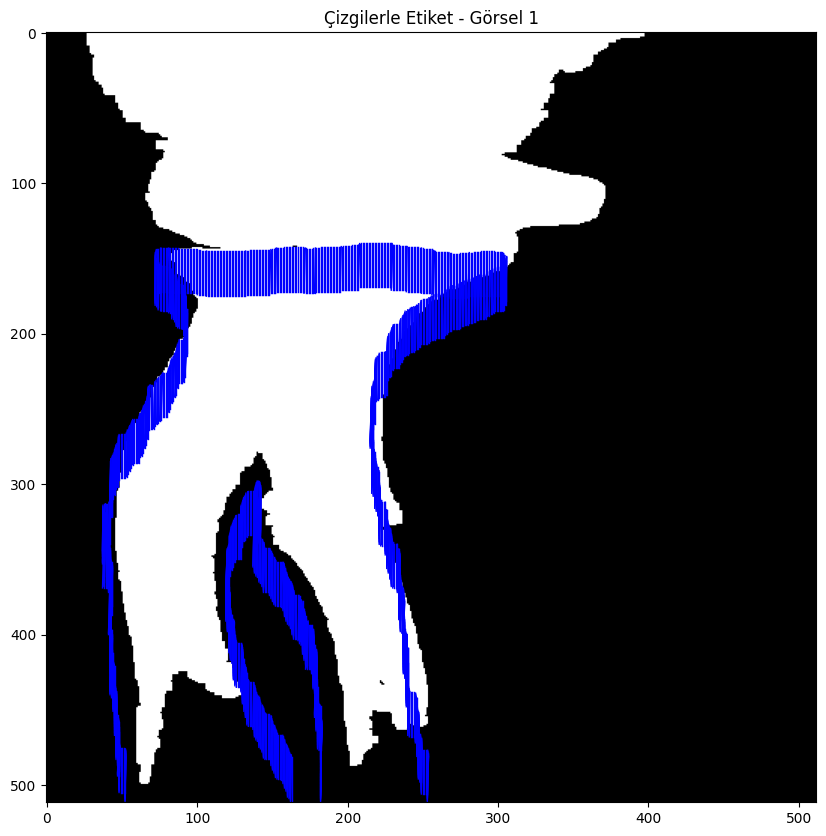

1. Görsel için:
  Çizgilerle Etiketin %Örtüşme Oranı: %51.43


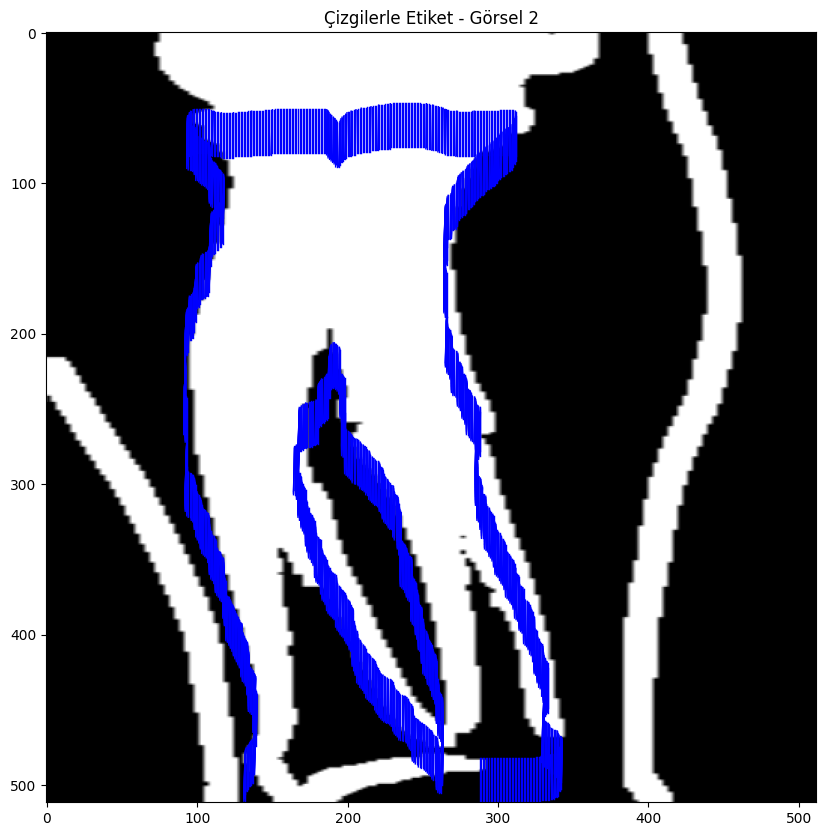

2. Görsel için:
  Çizgilerle Etiketin %Örtüşme Oranı: %44.77


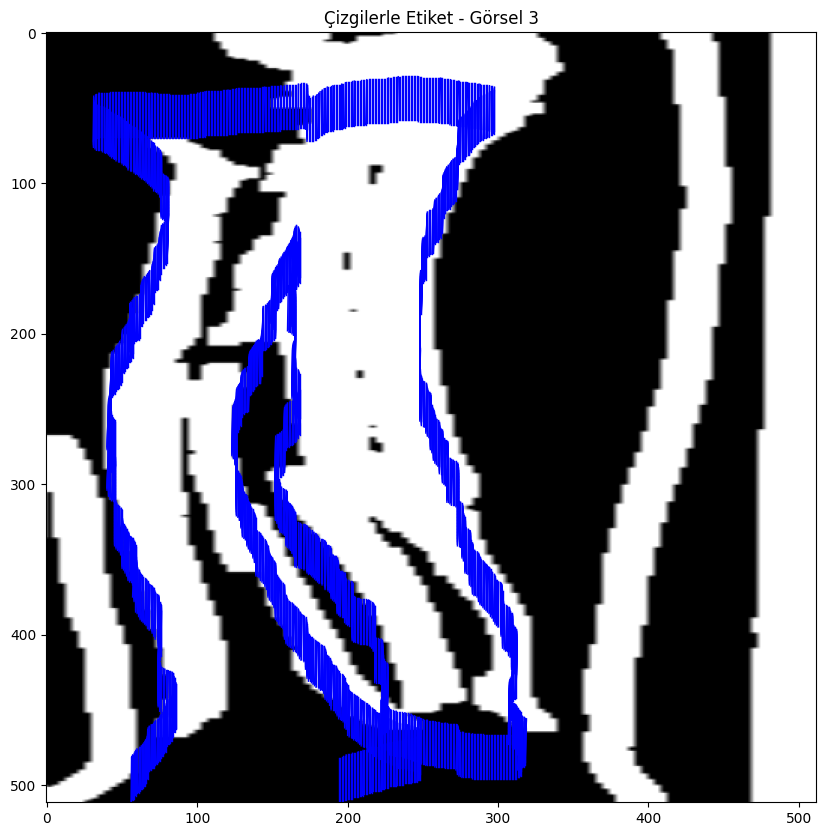

3. Görsel için:
  Çizgilerle Etiketin %Örtüşme Oranı: %43.62


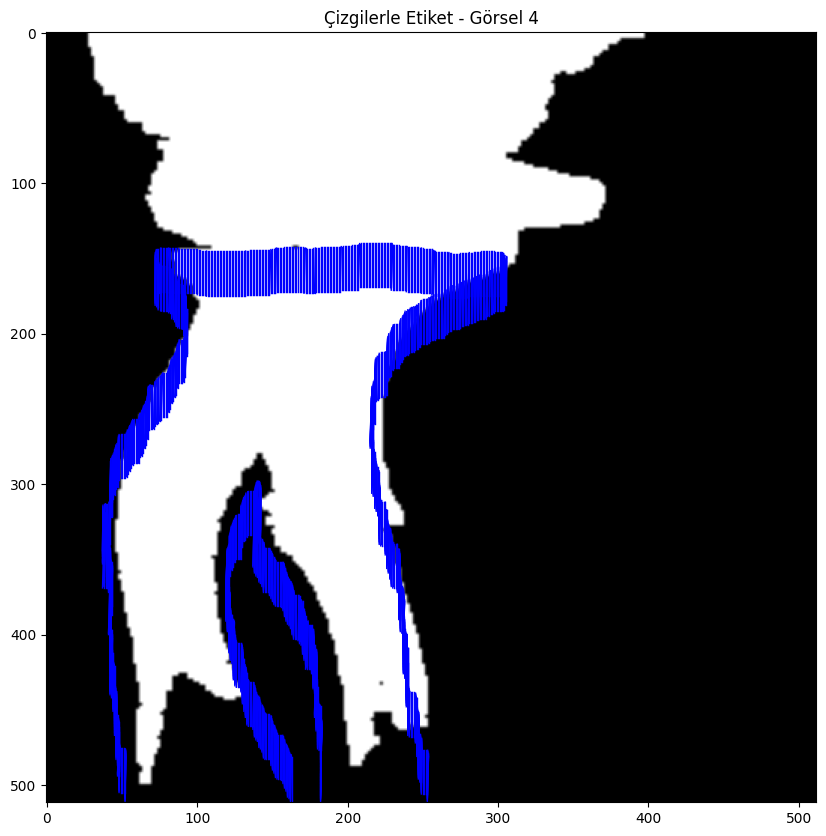

4. Görsel için:
  Çizgilerle Etiketin %Örtüşme Oranı: %51.43


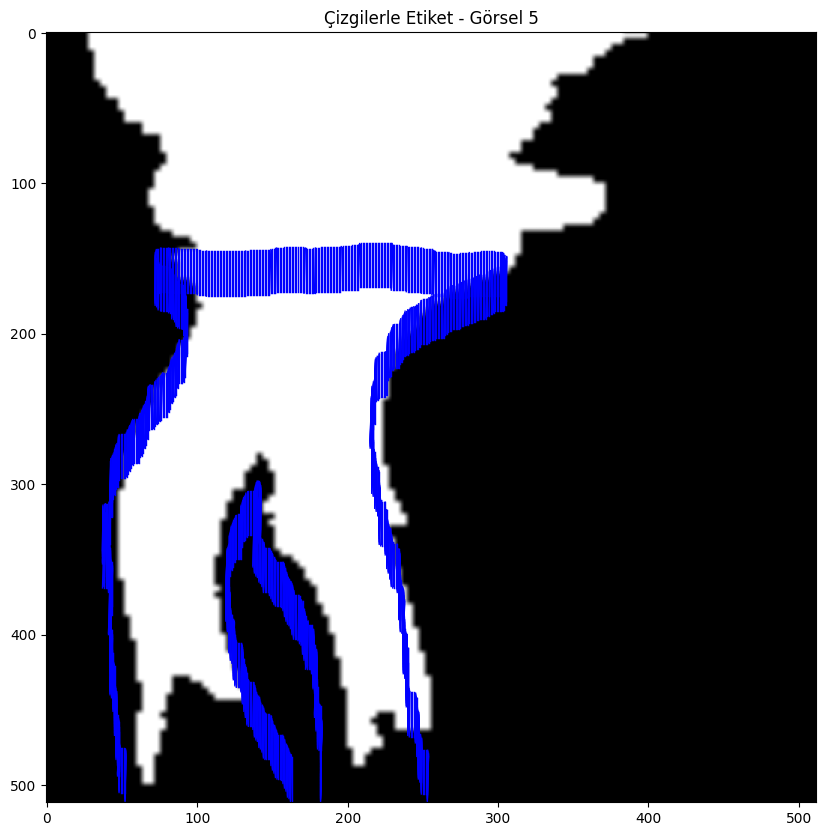

5. Görsel için:
  Çizgilerle Etiketin %Örtüşme Oranı: %51.43


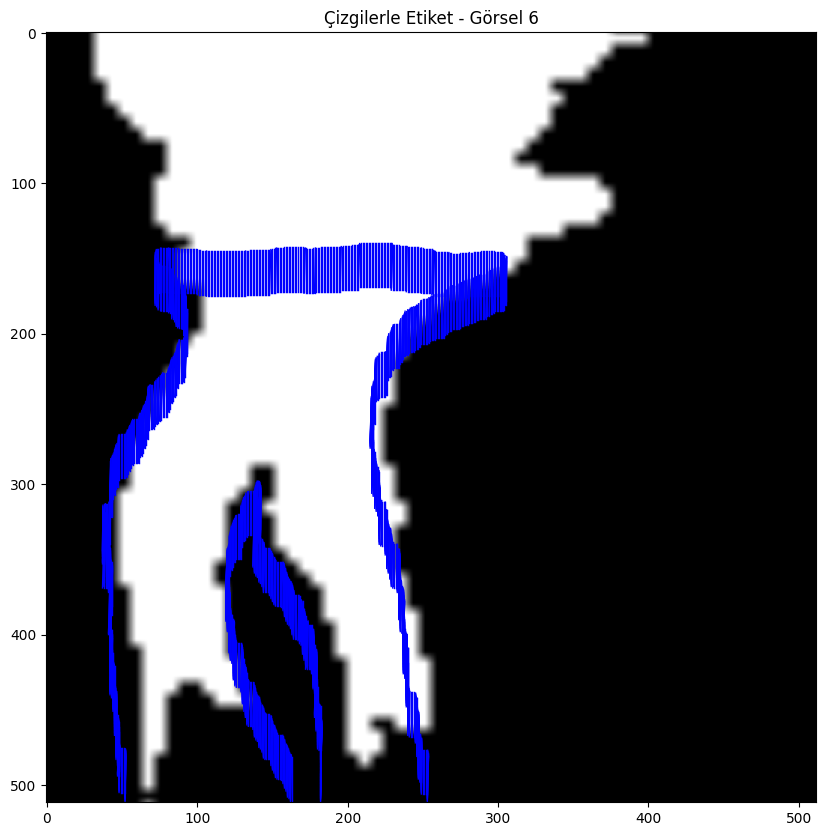

6. Görsel için:
  Çizgilerle Etiketin %Örtüşme Oranı: %51.43


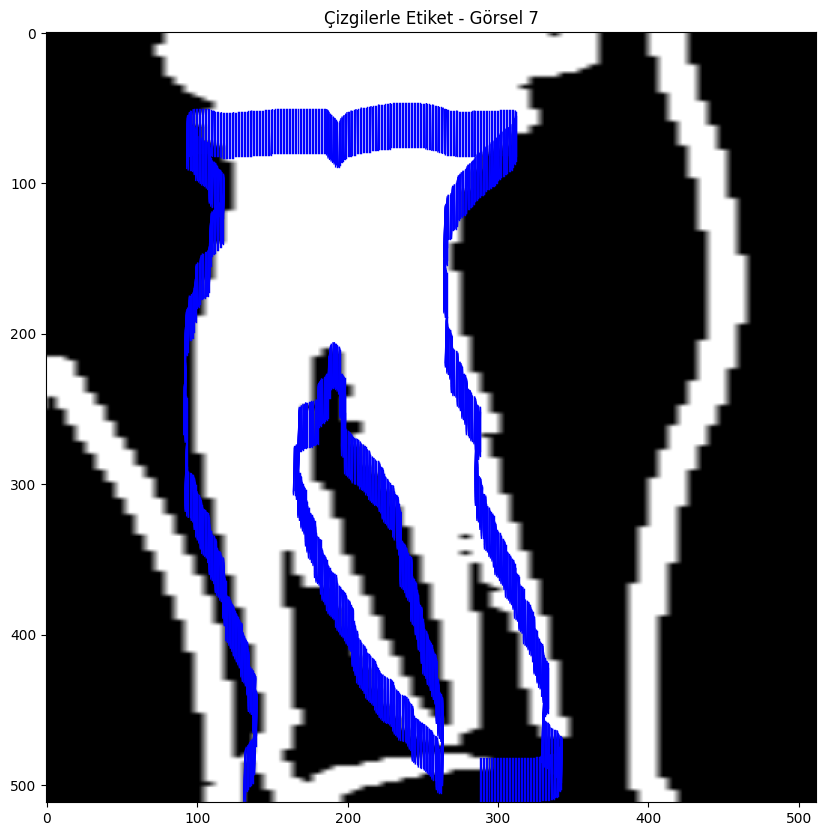

7. Görsel için:
  Çizgilerle Etiketin %Örtüşme Oranı: %44.77


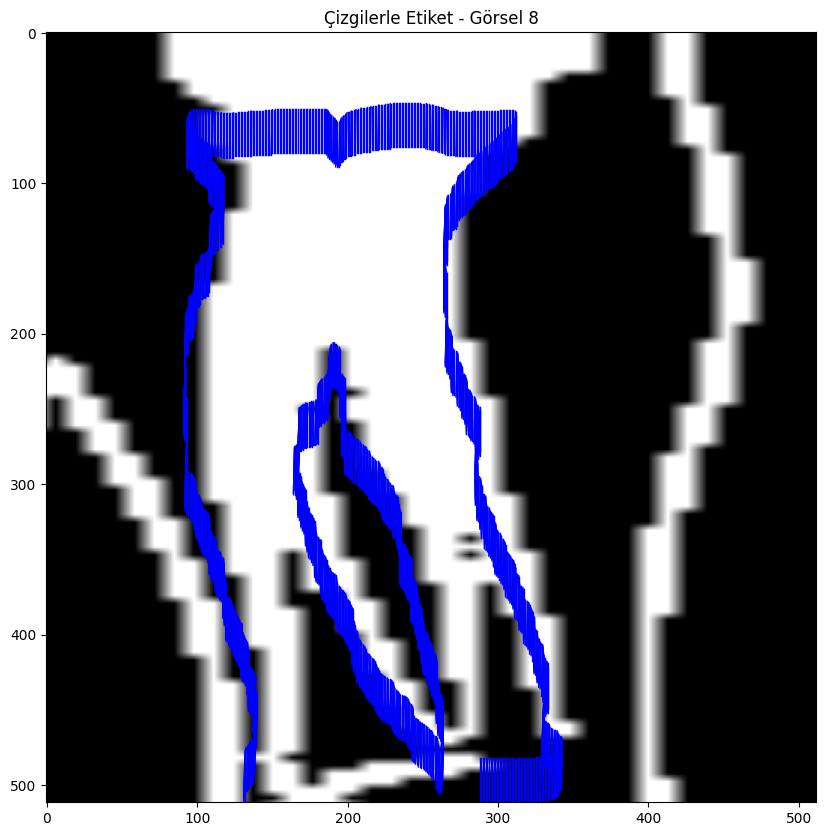

8. Görsel için:
  Çizgilerle Etiketin %Örtüşme Oranı: %44.77


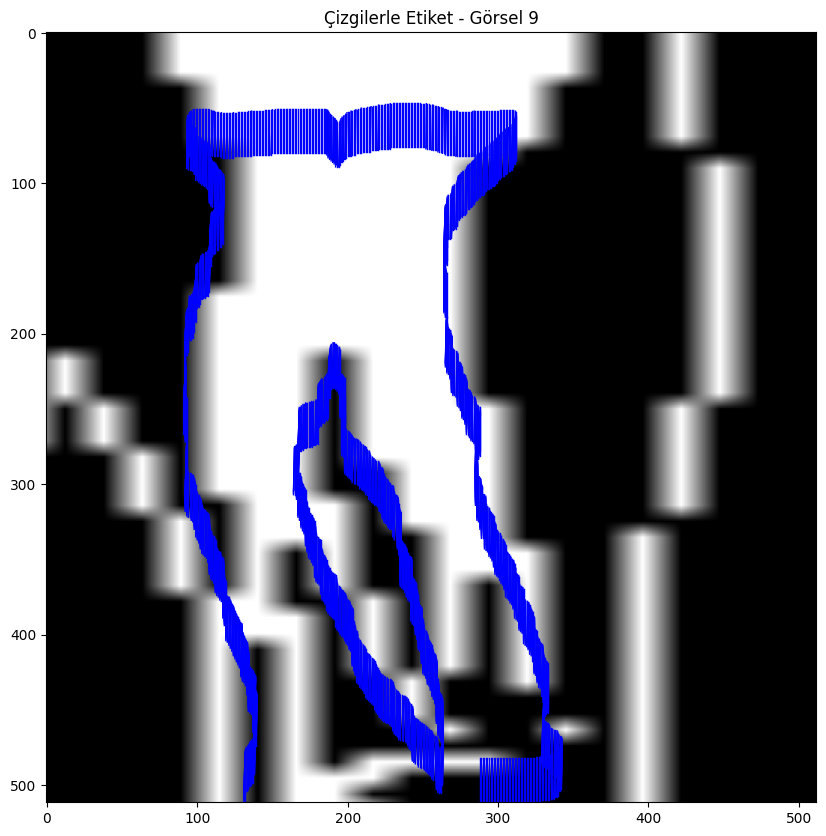

9. Görsel için:
  Çizgilerle Etiketin %Örtüşme Oranı: %44.77


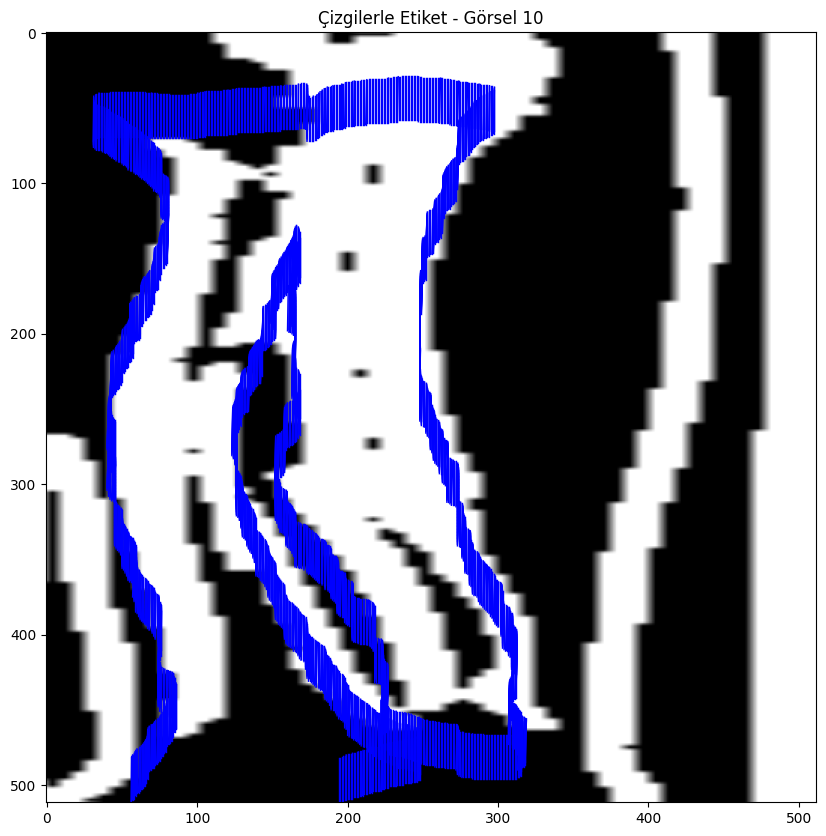

10. Görsel için:
  Çizgilerle Etiketin %Örtüşme Oranı: %43.62


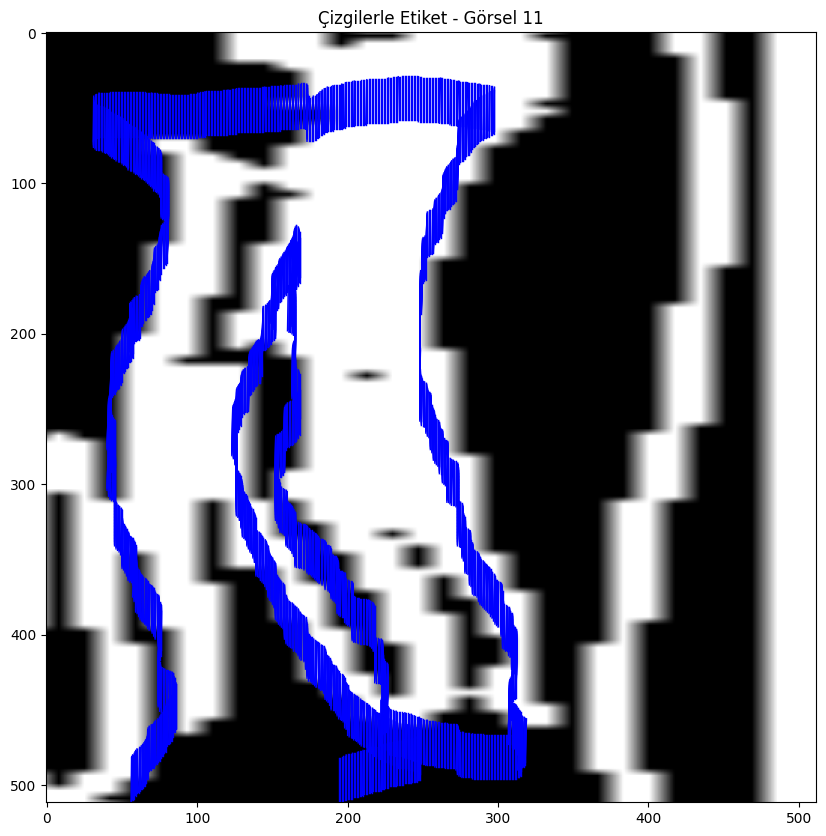

11. Görsel için:
  Çizgilerle Etiketin %Örtüşme Oranı: %43.62


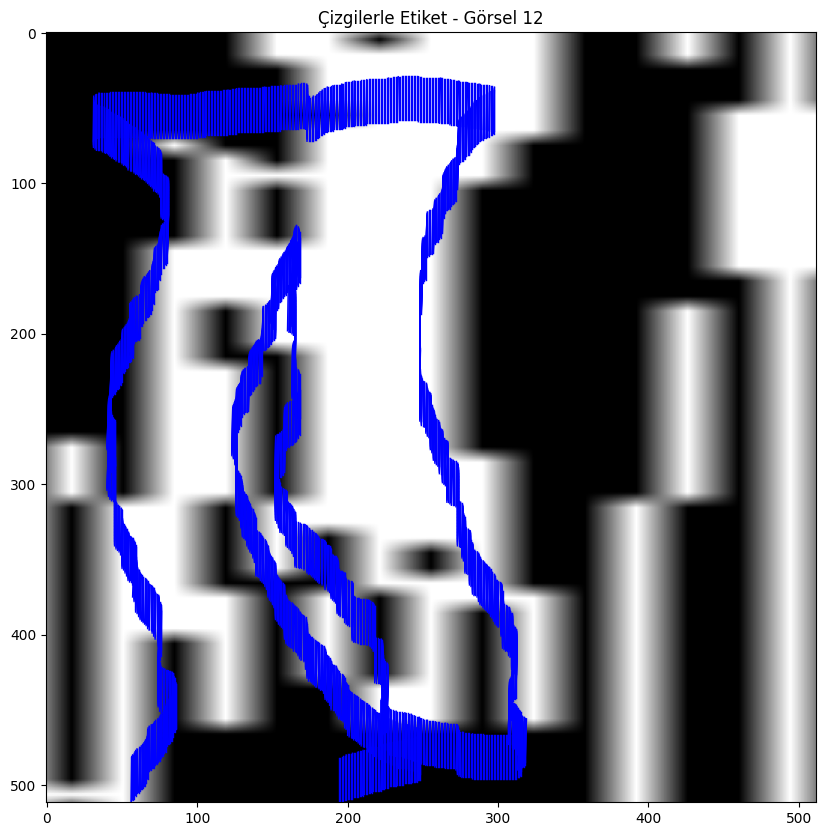

12. Görsel için:
  Çizgilerle Etiketin %Örtüşme Oranı: %43.62


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from skimage.io import imread
from skimage.draw import line
from skimage.transform import resize

# Görsel boyutlarını eşitlemek için en büyük boyutu belirle
def resize_to_largest(image_list):
    max_height = max([img.shape[0] for img in image_list])
    max_width = max([img.shape[1] for img in image_list])
    
    resized_images = []
    for img in image_list:
        resized_img = resize(img, (max_height, max_width), anti_aliasing=True)
        resized_images.append(resized_img)
    
    return resized_images

# Çizgi çizme fonksiyonu
def draw_line_from_edge(edge_point, length=30, angle=0):
    # Kenar noktasını merkeze alarak çizgi çizecek
    x, y = edge_point
    angle_rad = np.deg2rad(angle)

    # Çizgi uç noktalarını hesaplayalım
    x_end = int(x + length * np.cos(angle_rad))
    y_end = int(y + length * np.sin(angle_rad))

    # Çizgiyi çizmek için iki nokta döndür
    return (x, y), (x_end, y_end)

# Test için kullanılan fonksiyon
def test_lines_with_label(image, label, edges, line_length=30):
    """
    Çizilen çizgilerin doğru şekilde etiketle örtüşüp örtüşmediğini kontrol eder.
    
    :param image: Görsel
    :param label: Etiket görüntüsü (gri tonlamalı)
    :param edges: Kenarları belirleyen noktalar
    :param line_length: Çizilen çizgilerin uzunluğu
    :return: Etiketle örtüşen çizgilerin sayısı ve toplam çizgi sayısı
    """
    correct_overlap = 0  # Etiketle örtüşen çizgi sayısı
    total_lines = 0  # Çizilen toplam çizgi sayısı

    # Her kenar noktasından çizgi çizeceğiz
    for contour in edges:
        for point in contour:
            (x1, y1), (x2, y2) = draw_line_from_edge(point, length=line_length, angle=0)
            
            # Tam sayı değeri olan koordinatlar (int) kullanarak çizgi çizeceğiz
            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
            
            total_lines += 1
            
            # Çizgi ile etiketin örtüşüp örtüşmediğini kontrol edelim
            rr, cc = line(x1, y1, x2, y2)
            
            # Çizilen çizgi, etiketin içinde mi, kontrol edelim
            rr = np.clip(rr, 0, label.shape[0] - 1)  # Sıra sınırını kontrol et
            cc = np.clip(cc, 0, label.shape[1] - 1)  # Sütun sınırını kontrol et
            
            if np.any(label[rr, cc] == 1):  # Eğer çizgi organ bölgesine denk geliyorsa
                correct_overlap += 1

    overlap_percentage = (correct_overlap / total_lines) * 100 if total_lines > 0 else 0
    return correct_overlap, total_lines, overlap_percentage


# Yeni yollarla görselleri ve etiketleri yükleyelim
image_paths = [
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_3.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_3.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_3.png"
]
label_paths = [
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png"
]

# Görselleri yükle ve yeniden boyutlandır
images = [imread(path) for path in image_paths]
labels = [imread(path) for path in label_paths]

# Görselleri aynı boyuta getir
resized_images = resize_to_largest(images)
resized_labels = resize_to_largest(labels)

# Görselleri ve etiketleri işleme
for i, (image, label) in enumerate(zip(resized_images, resized_labels)):
    # Etiketin 3D (renkli) olup olmadığını kontrol et ve gerekirse gri tonlamaya dönüştür
    if label.ndim == 3:
        label = label[:, :, 0]  # Renkli görüntüyü gri tonlamaya dönüştür (ilk kanal)

    # Etikette kenarları bulma
    edges = measure.find_contours(label, level=0.5)

    # Çizim işlemi
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image, cmap="gray")

    # Çizgi uzunluğunu belirleyelim
    line_length = 30

    # Her kenar noktasından çizgi çizelim
    for contour in edges:
        for point in contour:
            (x1, y1), (x2, y2) = draw_line_from_edge(point, length=line_length, angle=0)  # 0 derece yatay çizgi

            # Görselin sınırları içinde olduğundan emin olalım
            if 0 <= x1 < image.shape[0] and 0 <= y1 < image.shape[1] and 0 <= x2 < image.shape[0] and 0 <= y2 < image.shape[1]:
                ax.plot([y1, y2], [x1, x2], color="blue", linewidth=1)

    plt.title(f"Çizgilerle Etiket - Görsel {i+1}")
    plt.show()

    # Test fonksiyonunu çalıştırma
    correct_overlap, total_lines, overlap_percentage = test_lines_with_label(image, label, edges)

    # Test sonuçlarını yazdıralım
    print(f"{i+1}. Görsel için:")
    print(f"  Çizgilerle Etiketin %Örtüşme Oranı: %{overlap_percentage:.2f}")



##### Sonuç Analizi
Orijinal Görüntülerin Yüzde Örtüşme Değerleri:

Kırık 6 (Level 0): %51.43
Kırık 3 (Level 0): %44.77
Kırık 2 (Level 0): %43.62
Level 1-2-3 Düzeylerindeki Sonuçlar:

Kırık 6 (Level 1-2-3): %51.43
Kırık 3 (Level 1-2-3): %44.77
Kırık 2 (Level 1-2-3): %43.62
Genel Yorumlar:

Kırık 6 Görüntüsü (Level 0 ile Level 1-2-3 Arasındaki Değişim):

Kırık 6 görüntüsünde, Level 0'da elde edilen %51.43 değerinin, Level 1, 2 ve 3'te de sabit kaldığı görülüyor.
Bu, Gaussian Blur düzeylerinin artırılmasının, kırık 6 görüntüsü üzerinde hiçbir önemli değişiklik yaratmadığını gösteriyor.
Görüntü üzerinde yapılan bu işlemler, muhtemelen görselin yapısal özelliklerini fazla değiştirmediği için örtüşme oranında herhangi bir artış veya azalma gözlemlenmiyor.
Kırık 3 Görüntüsü (Level 0 ile Level 1-2-3 Arasındaki Değişim):

Kırık 3 görüntüsünde de, Level 0'da %44.77 olan örtüşme oranı, Level 1, 2 ve 3'te sabit kalıyor.
Bu da benzer şekilde, Gaussian Blur işleminin Kırık 3'ün görüntüsüne etkisi olmadığını, ya da bu düzeylerde herhangi bir önemli değişiklik yaratmadığını gösteriyor.
Kırık 2 Görüntüsü (Level 0 ile Level 1-2-3 Arasındaki Değişim):

Kırık 2 görüntüsünde de, Level 0'da %43.62 olan örtüşme oranı, Level 1, 2 ve 3'te değişmeden sabit kalıyor.
Bu da yine, Gaussian düzeylerinin etkisinin, Kırık 2 görüntüsünde önemli bir fark yaratmadığını ortaya koyuyor.
Genel Değerlendirme:

Gaussian Düzeylerinin Etkisi: Görüntülerdeki örtüşme oranları, Gaussian Blur düzeylerinin artırılmasına rağmen sabit kalıyor. Bu, muhtemelen görsellerin karmaşıklığı veya kullanılan algoritmaların, bu tür düzey değişikliklerine duyarsız olduğu anlamına gelebilir. Özellikle daha yüksek düzeydeki Gaussian Blur işlemleri, görüntülerin kenar özelliklerini fazla değiştirmiyor veya görsellerdeki ana hatları kaybetmiyor olabilir.

Etkisiz Gaussian Uygulaması: Görüntülerin çoğunda sonuçların değişmemesi, kullanılan düzeylerin (Level 1, 2, 3) bu görüntülerin özelliklerini fazla etkilemediğini, ya da etkilese bile bu etkinin çok küçük kaldığını gösteriyor. Bu, kullanılan pipeline'da veya algoritmaların hataları yakalama ve analiz etme yeteneklerinin sınırlı olduğu anlamına da gelebilir.



## Her bir kenar noktasından m x m boyutlu patch alma:

extract_patch fonksiyonu, her kenar noktasından bir patch alarak, bu patch'leri gösteriyor. Bu, etiket üzerinde çalışarak, kenarları belirliyor ve her bir kenar noktasından patch çıkartılıyor. adımlar:

-Canny kenar tespiti yapılacak.

-Kenar noktalarından m x m boyutunda patch alınacak.

-Alınan patch, etiketle karşılaştırılacak ve sonucu test görselinde göstereceğiz.

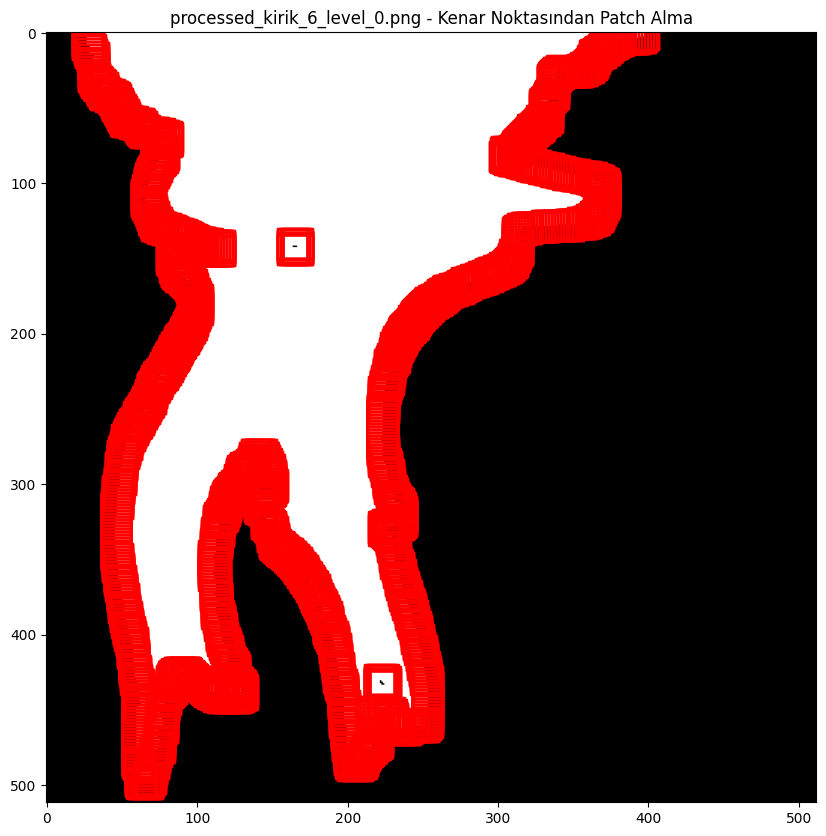

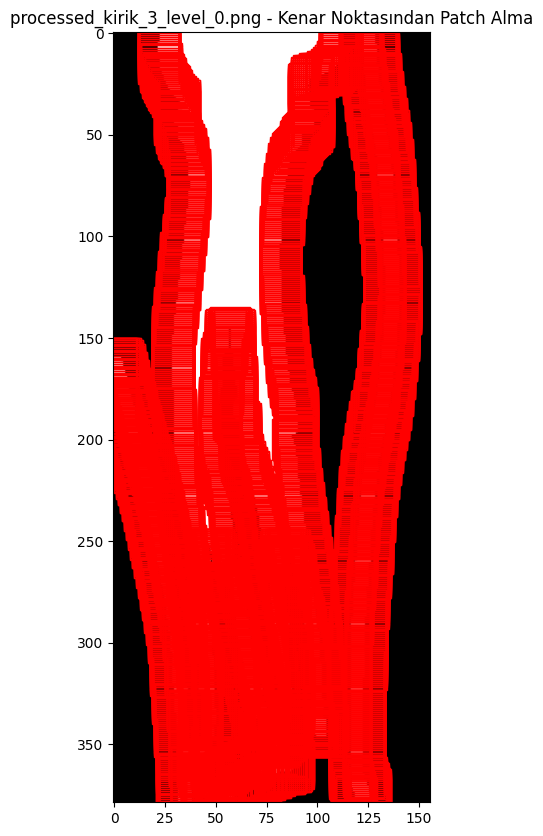

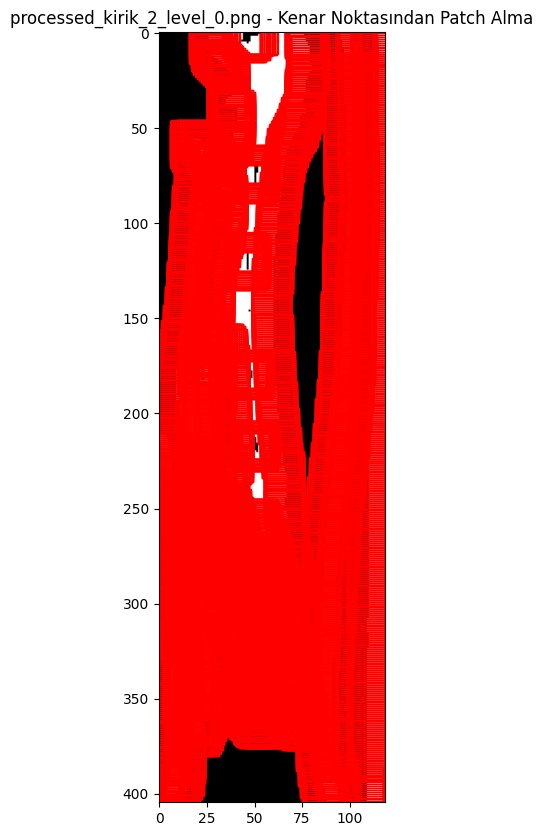

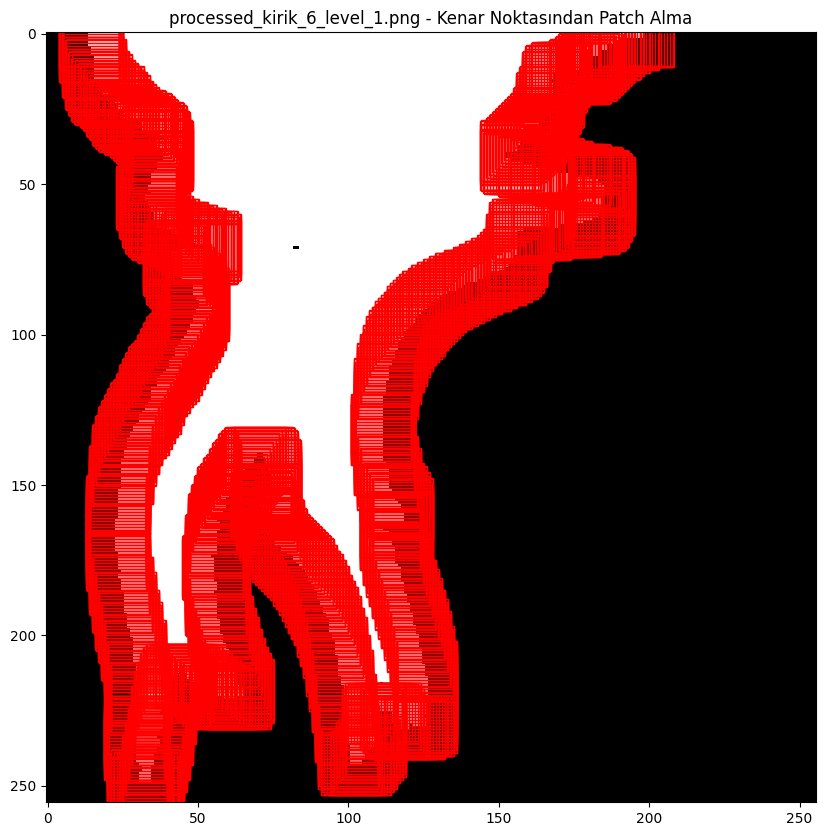

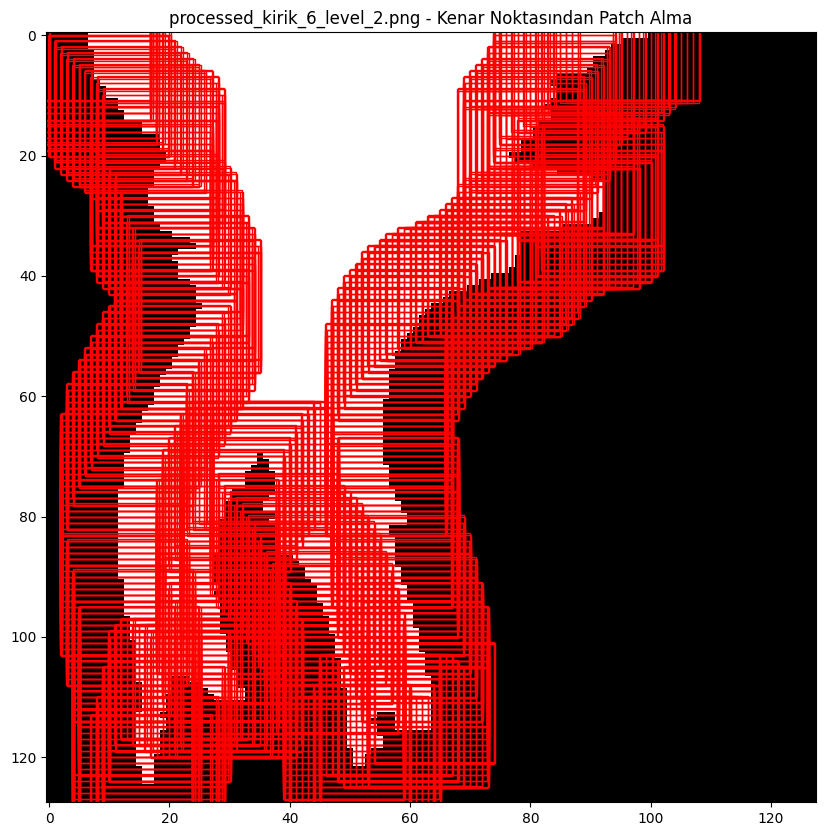

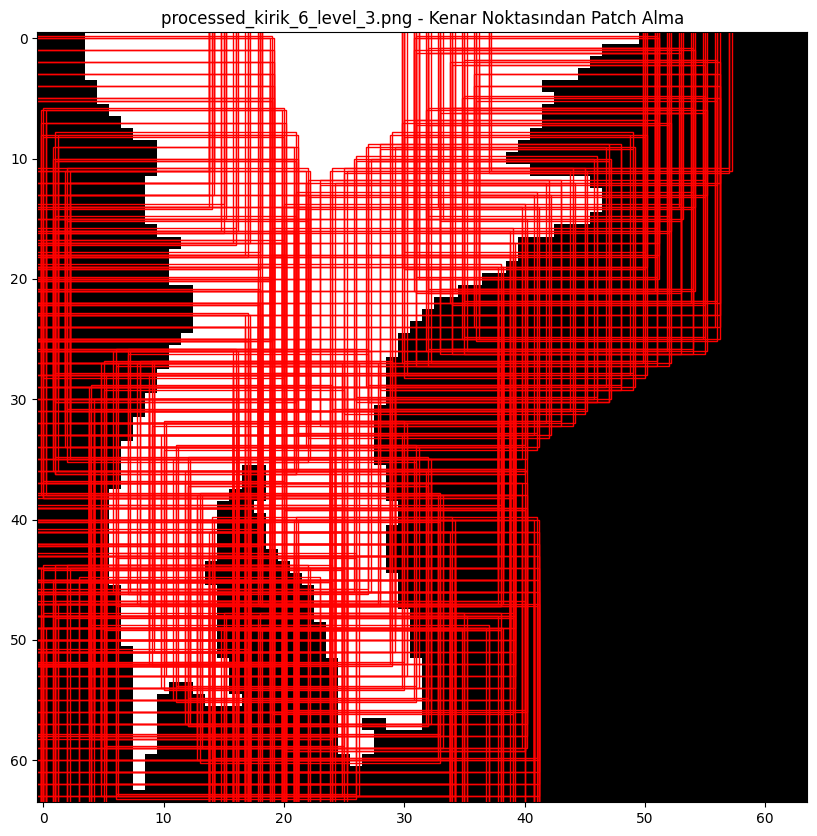

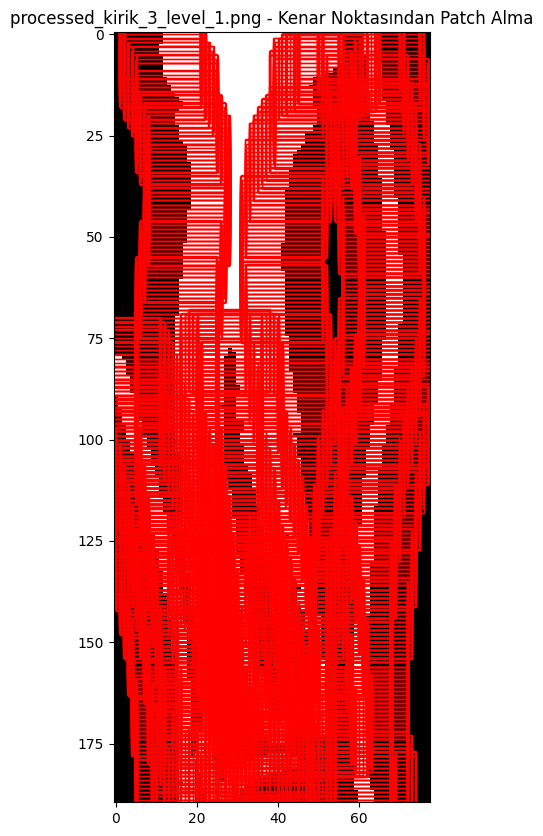

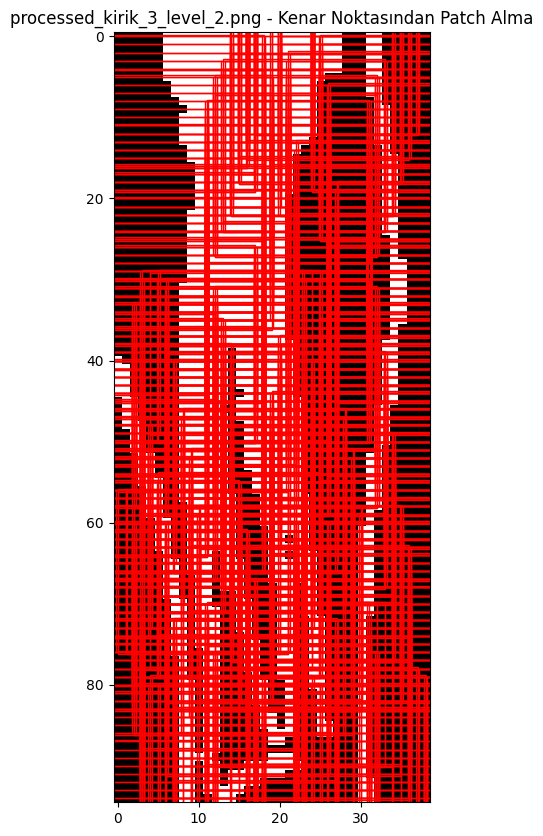

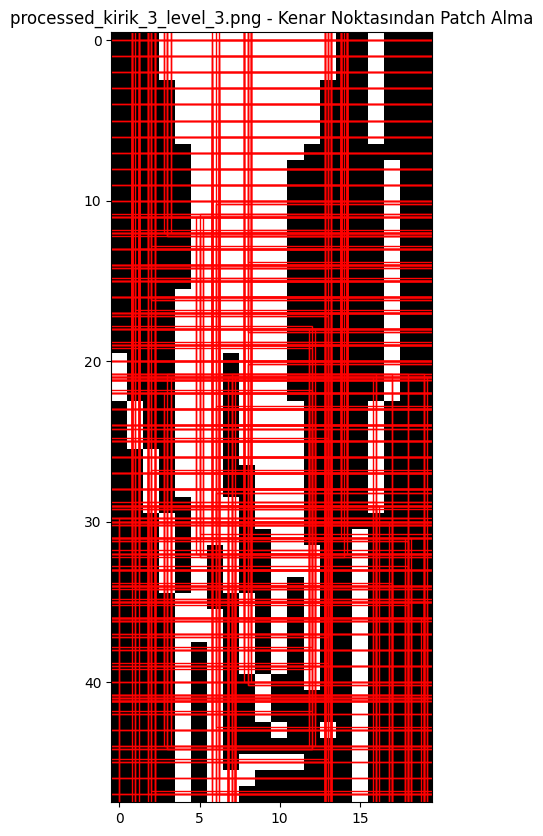

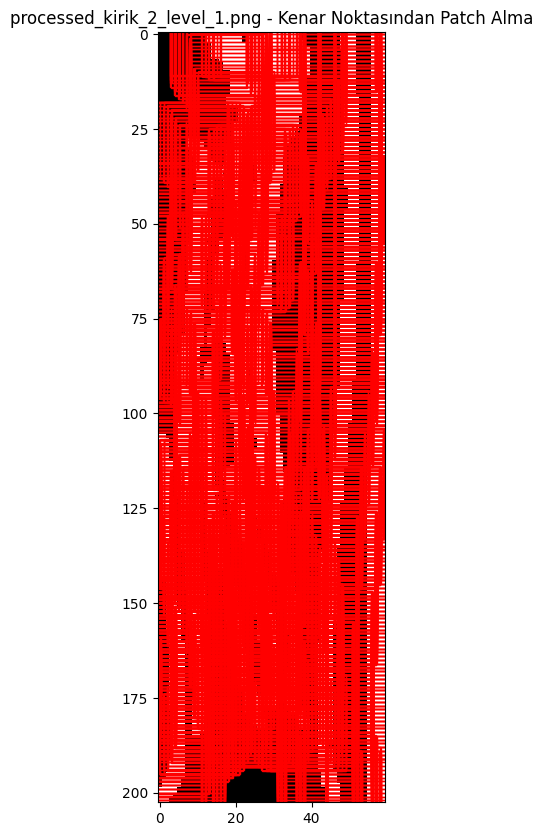

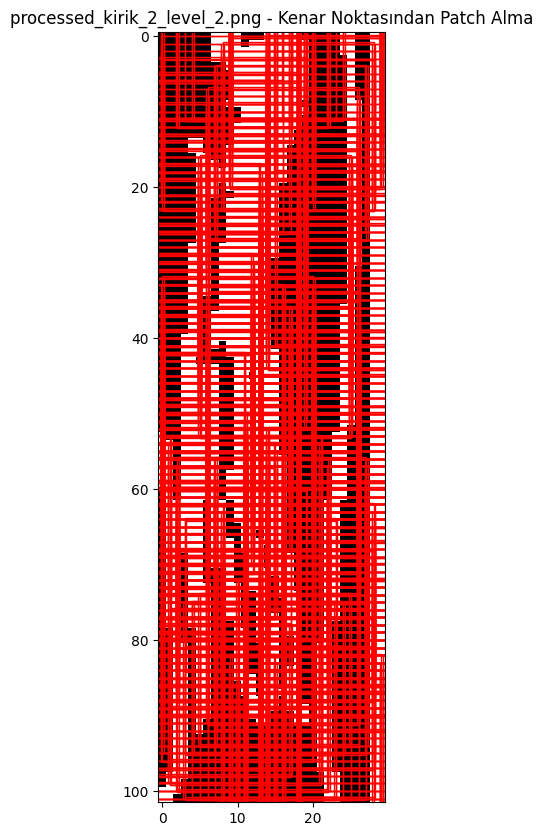

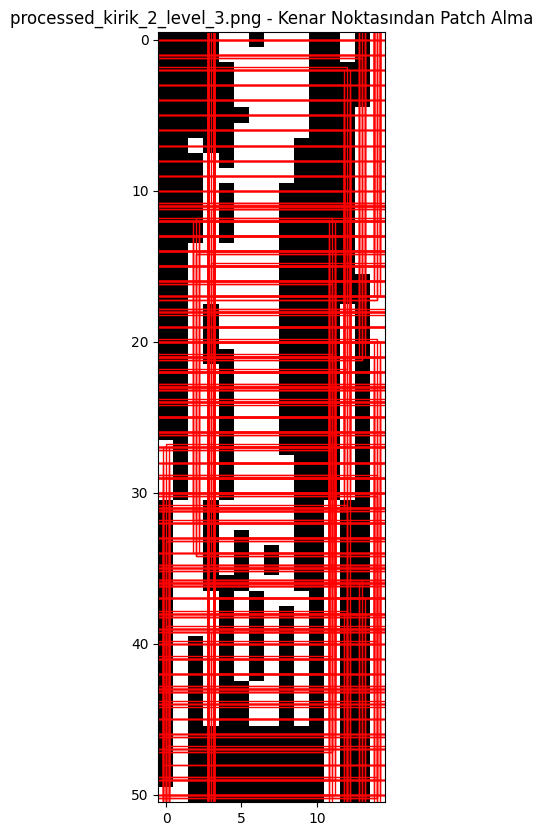

In [40]:
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import measure
from skimage.feature import canny
from skimage.io import imread
from skimage.color import rgb2gray

# Parametreler
m = 20  # Patch boyutu (m x m)

# Görsel yolları
image_paths = [
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_3.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_3.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_3.png"
]


# Patch alma fonksiyonu
def extract_patch(image, center, m):
    x, y = center
    half_m = m // 2
    patch = image[max(0, y - half_m):y + half_m + 1, max(0, x - half_m):x + half_m + 1]
    return patch

# Görsel üzerinden işlem yapma
for image_path, label_path in zip(image_paths, label_paths):
    # Görseli ve etiketi yükle
    image = imread(image_path)
    label = imread(label_path)

    # Görüntünün 2D veya 3D olduğunu kontrol et
    if len(image.shape) == 3 and image.shape[2] == 4:  # RGBA görüntü
        image = image[:, :, :3]  # RGBA'dan RGB'ye geçiş yap
    elif len(image.shape) == 2:  # Gri tonlama (2D)
        pass  # 2D görüntü zaten gri tonlamadır

    # Eğer görüntü 3 kanal (RGB) ise gri tonlamaya dönüştürme
    if len(image.shape) == 3:
        image_gray = rgb2gray(image)
    else:
        image_gray = image  # Zaten gri tonlamalıysa

    # Kenar tespiti ve filtreleme
    edges = canny(image_gray, sigma=2.0)  # Sigma'yı artırarak kenarları daha belirginleştiriyoruz

    # Kenarları bul
    contours = measure.find_contours(edges, 0.8)  # Kenar yoğunluğunu artırmak için eşik değerini ayarlıyoruz

    # Patch alma ve görselleştirme
    fig, ax = plt.subplots(figsize=(10, 10))  # Her görsel için yeni bir figür oluşturuyoruz
    ax.imshow(image, cmap='gray')

    for contour in contours:
        for point in contour:
            y, x = point  # Kenar noktasının (y, x) koordinatları
            patch = extract_patch(image, (int(x), int(y)), m)

            # Patch'i görselleştir (dikdörtgen)
            ax.add_patch(plt.Rectangle((x - m // 2, y - m // 2), m, m, linewidth=1, edgecolor='red', facecolor='none'))

    # Başlık
    ax.set_title(f"{os.path.basename(image_path)} - Kenar Noktasından Patch Alma")
    plt.show()



#### Test: 

Bu kod, her bir görsel için kenar tespiti yapar, bu kenarları kullanarak patch çıkarır, bu patch'in etiketini kontrol eder ve modelin tahmin ettiği etiketi 0 ve 1'ler ile karşılaştırarak doğruluk oranını hesaplar.
Her bir görselin doğruluk oranı bağımsız olarak hesaplanır ve yazdırılır.

In [54]:
import numpy as np
import os
from skimage.io import imread
from skimage.feature import canny
from skimage.color import rgb2gray
from skimage.measure import find_contours
import matplotlib.pyplot as plt

# Parametreler
m = 20  # Patch boyutu (m x m)

# Görsel ve etiket yolları
image_paths = [
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_3.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_3.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_3.png"
]

label_paths = [
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png"
]

# Patch alma fonksiyonu
def extract_patch(image, center, m):
    x, y = center
    half_m = m // 2
    patch = image[max(0, y - half_m):y + half_m + 1, max(0, x - half_m):x + half_m + 1]
    return patch

# Her görsel için doğruluk oranını hesaplama
for image_path, label_path in zip(image_paths, label_paths):
    correct_predictions = 0
    total_patches = 0

    # Görüntüyü ve etiketi yükle
    image = imread(image_path)
    label = imread(label_path)

    # Görüntü ve etiket gri tonlamaya dönüştürme
    if len(image.shape) == 3:
        image_gray = rgb2gray(image)
    else:
        image_gray = image  # Zaten gri tonlamalıysa

    # Kenar tespiti
    edges = canny(image_gray, sigma=2.0)

    # Kenarları bulma
    contours = find_contours(edges, 0.8)

    # Patch alma ve doğruluk hesaplama
    for contour in contours:
        for point in contour:
            y, x = point  # Kenar noktasının (y, x) koordinatları
            patch = extract_patch(image, (int(x), int(y)), m)

            # Etiketin geçerli koordinatlarda olup olmadığını kontrol et
            if 0 <= int(y) < label.shape[0] and 0 <= int(x) < label.shape[1]:
                patch_label = label[int(y), int(x)]  # Etiket, etiket görüntüsündeki ilgili piksel
            else:
                continue  # Geçersiz koordinatlar için atla

            # Modelin tahmini: Ortalama piksel değeri 0.5'ten büyükse 1, küçükse 0
            predicted_label = 1 if np.mean(patch) > 0.5 else 0

            # Etiketin bir değere sahip olup olmadığını kontrol et
            if np.ndim(patch_label) == 0:  # Tek bir değer
                if predicted_label == patch_label:
                    correct_predictions += 1
            else:  # Eğer etiket bir array ise
                for label_value in patch_label:
                    if predicted_label == label_value:
                        correct_predictions += 1
                        
            total_patches += 1

    # Görsel için doğruluk oranını hesaplama
    accuracy = (correct_predictions / total_patches) * 100
    print(f"{image_path}: Doğruluk oranı: %{accuracy:.2f}")



C:\Users\songu\Downloads\images\processed_kirik_6_level_0.png: Doğruluk oranı: %0.12
C:\Users\songu\Downloads\images\processed_kirik_3_level_0.png: Doğruluk oranı: %0.41
C:\Users\songu\Downloads\images\processed_kirik_2_level_0.png: Doğruluk oranı: %0.00
C:\Users\songu\Downloads\images\processed_kirik_6_level_1.png: Doğruluk oranı: %0.51
C:\Users\songu\Downloads\images\processed_kirik_6_level_2.png: Doğruluk oranı: %0.00
C:\Users\songu\Downloads\images\processed_kirik_6_level_3.png: Doğruluk oranı: %0.00
C:\Users\songu\Downloads\images\processed_kirik_3_level_1.png: Doğruluk oranı: %0.09
C:\Users\songu\Downloads\images\processed_kirik_3_level_2.png: Doğruluk oranı: %0.00
C:\Users\songu\Downloads\images\processed_kirik_3_level_3.png: Doğruluk oranı: %0.00
C:\Users\songu\Downloads\images\processed_kirik_2_level_1.png: Doğruluk oranı: %0.00
C:\Users\songu\Downloads\images\processed_kirik_2_level_2.png: Doğruluk oranı: %0.00
C:\Users\songu\Downloads\images\processed_kirik_2_level_3.png: Do

### Label kenarını k çaplı dairesel bir yapısal elementle genişletme:

Bu kod, etiketin kenarlarını morphology.binary_erosion ve ^ (XOR) işlemi ile genişletiyor. Bu, etiket kenarını k çaplı dairesel bir yapı ile genişletme işlemine karşılık geliyor.

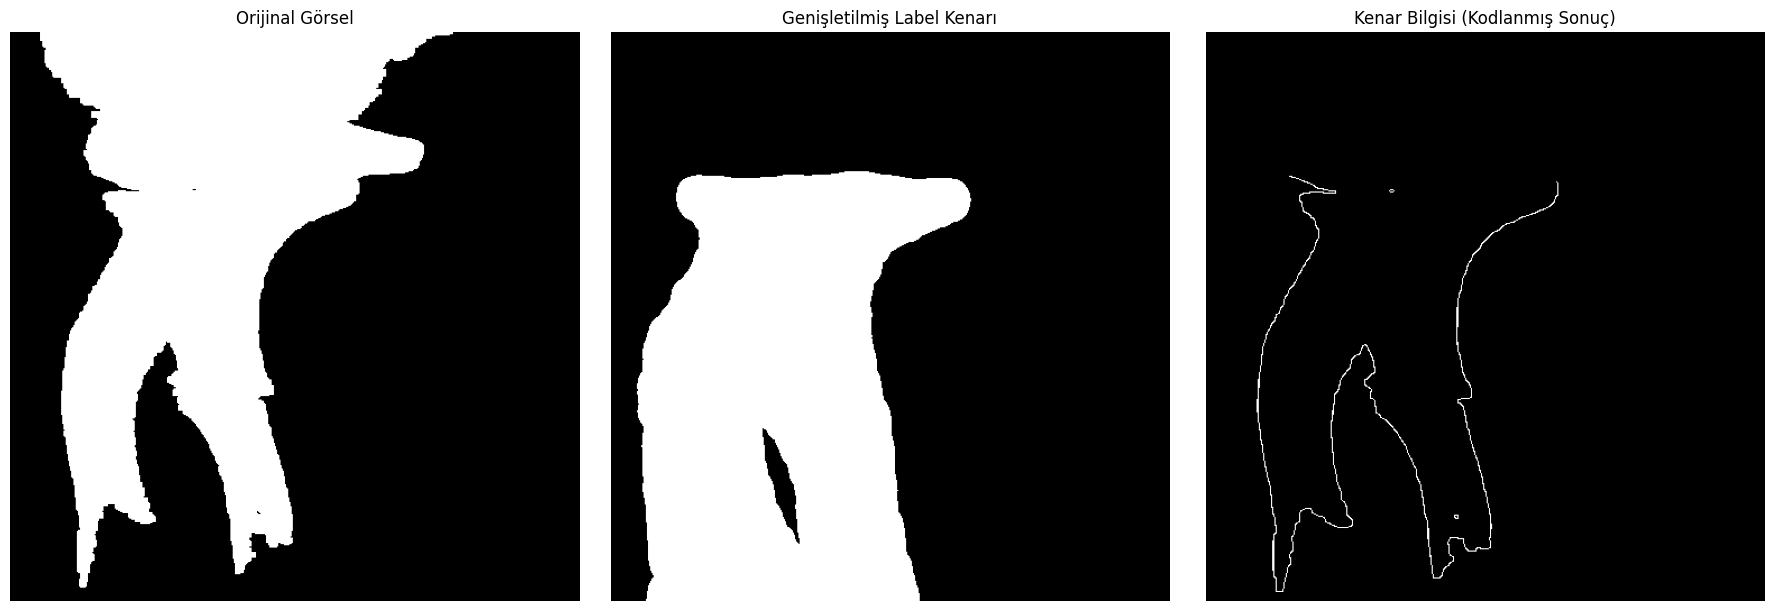

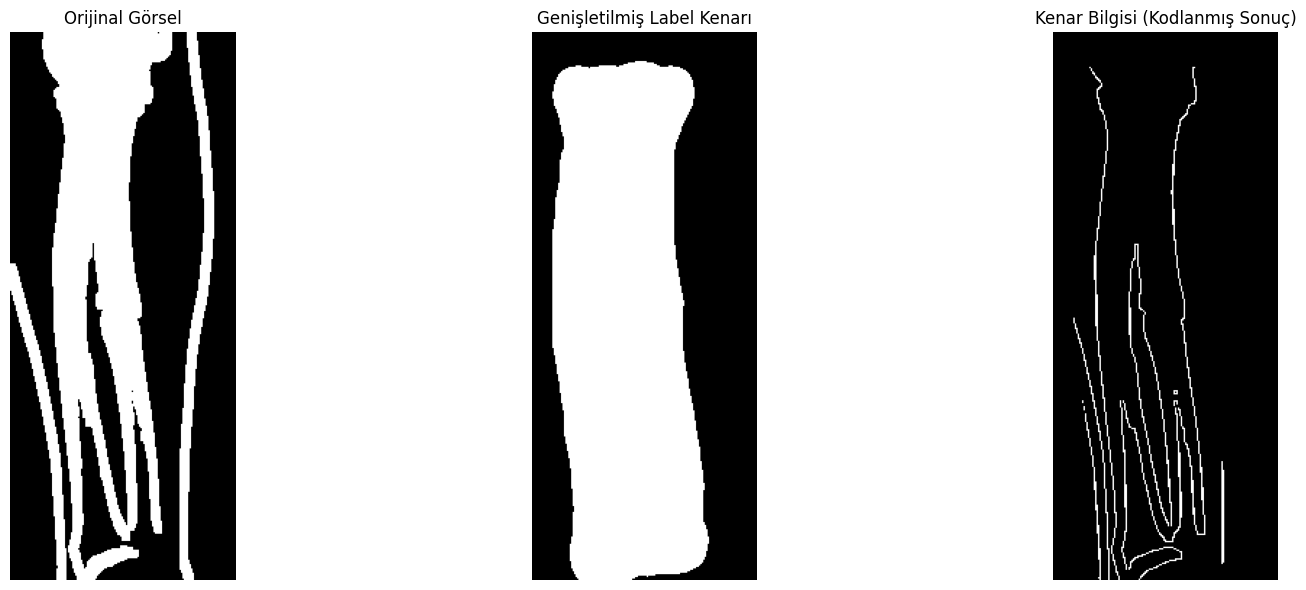

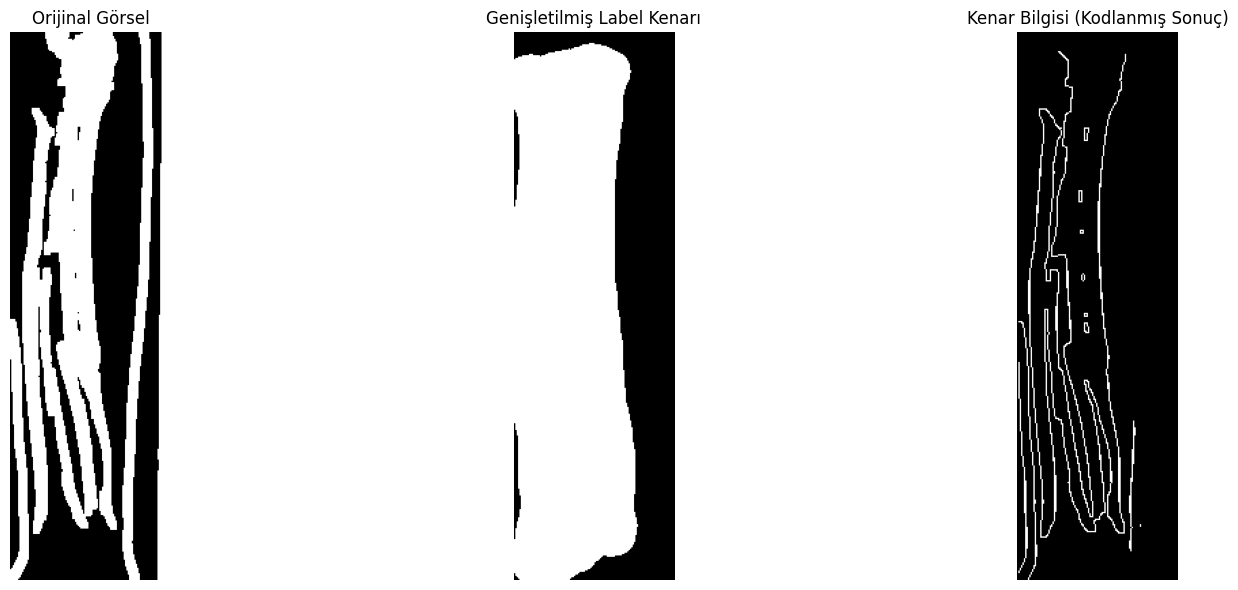

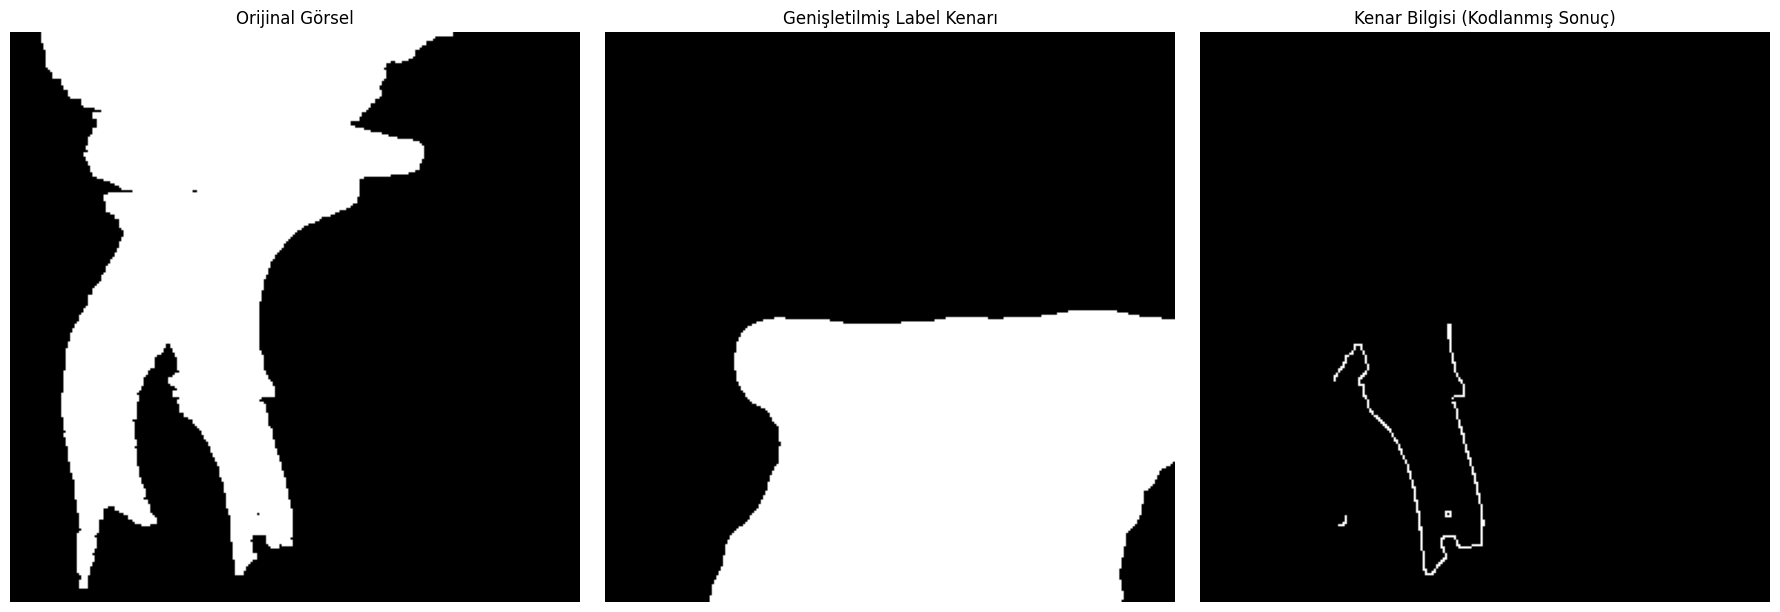

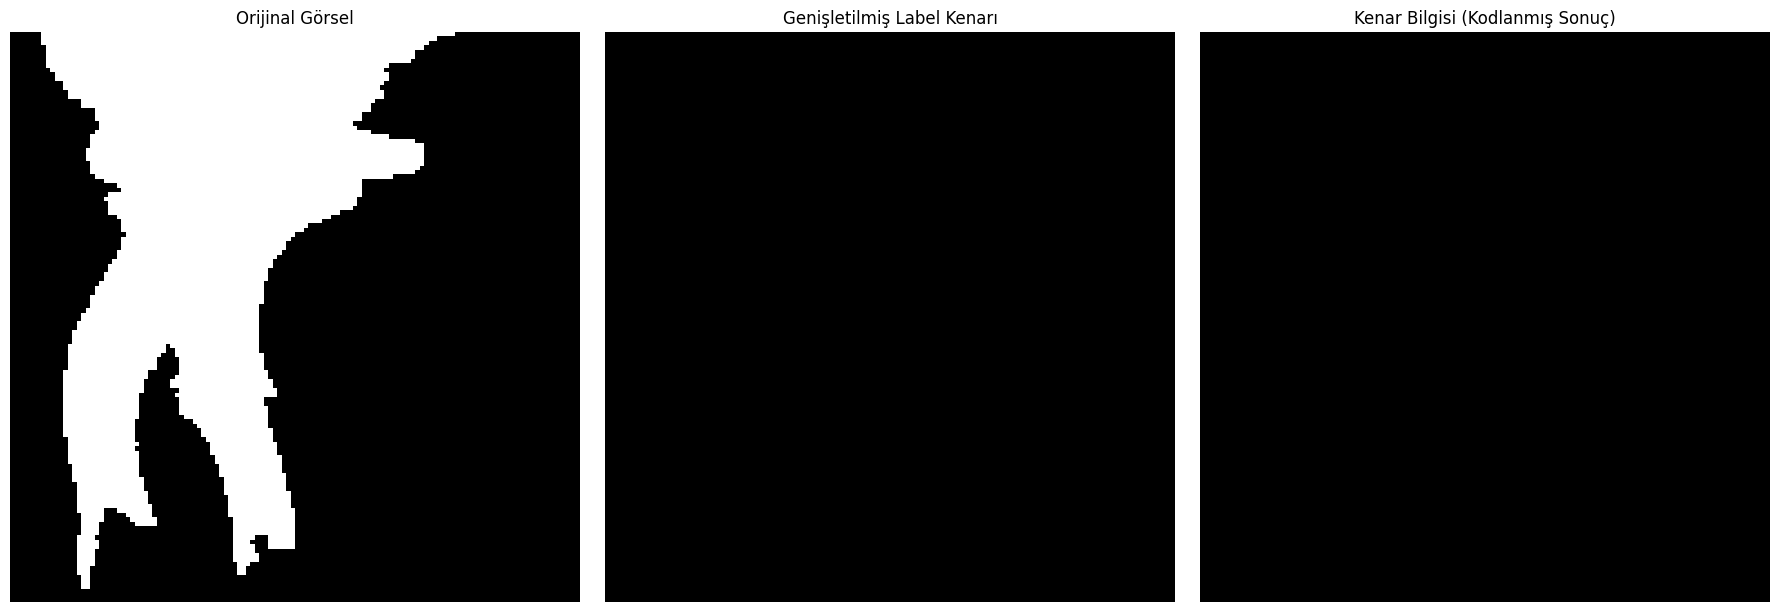

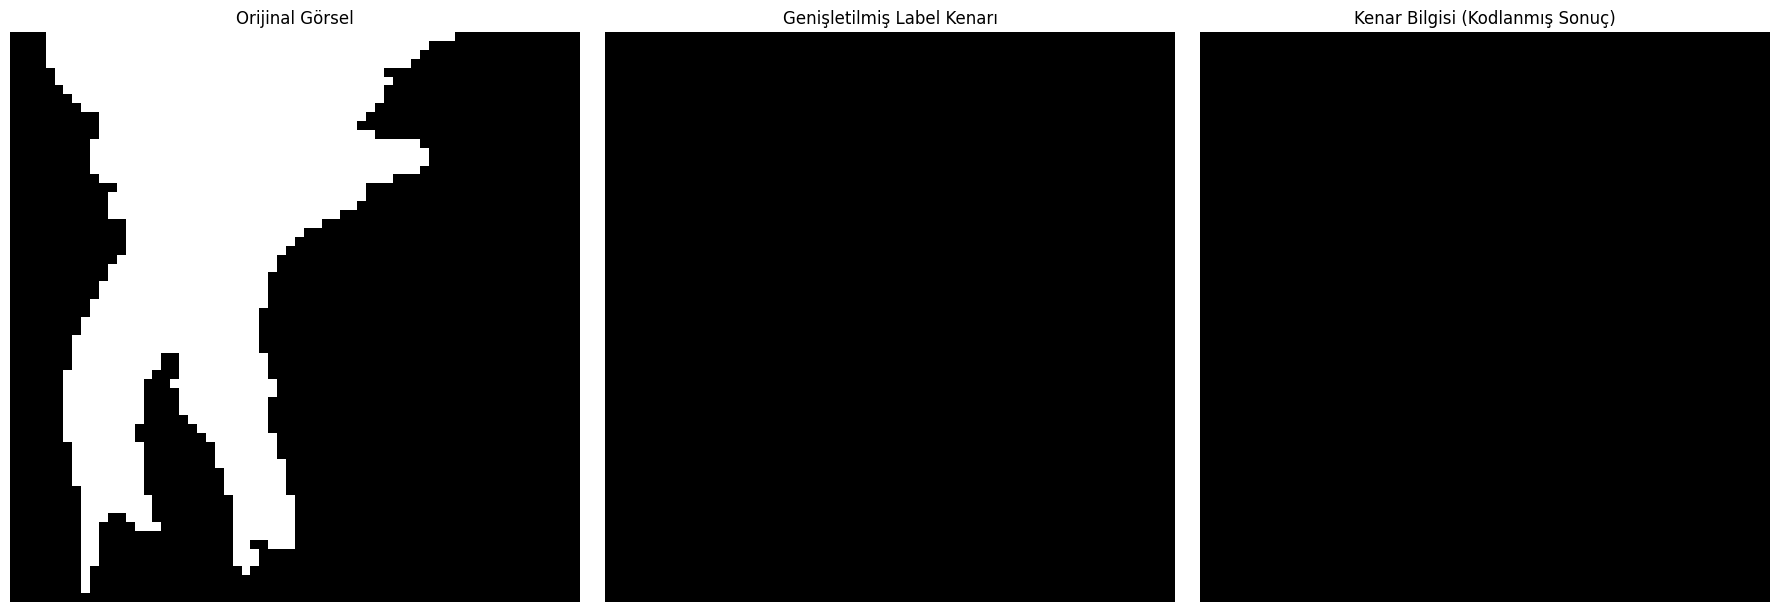

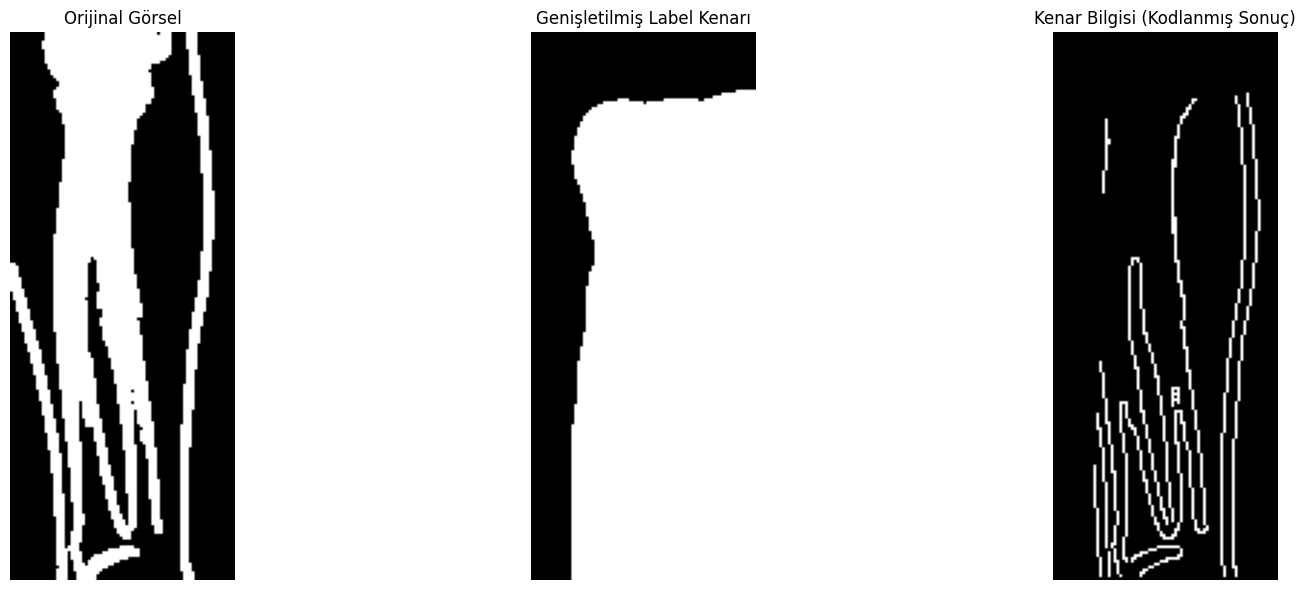

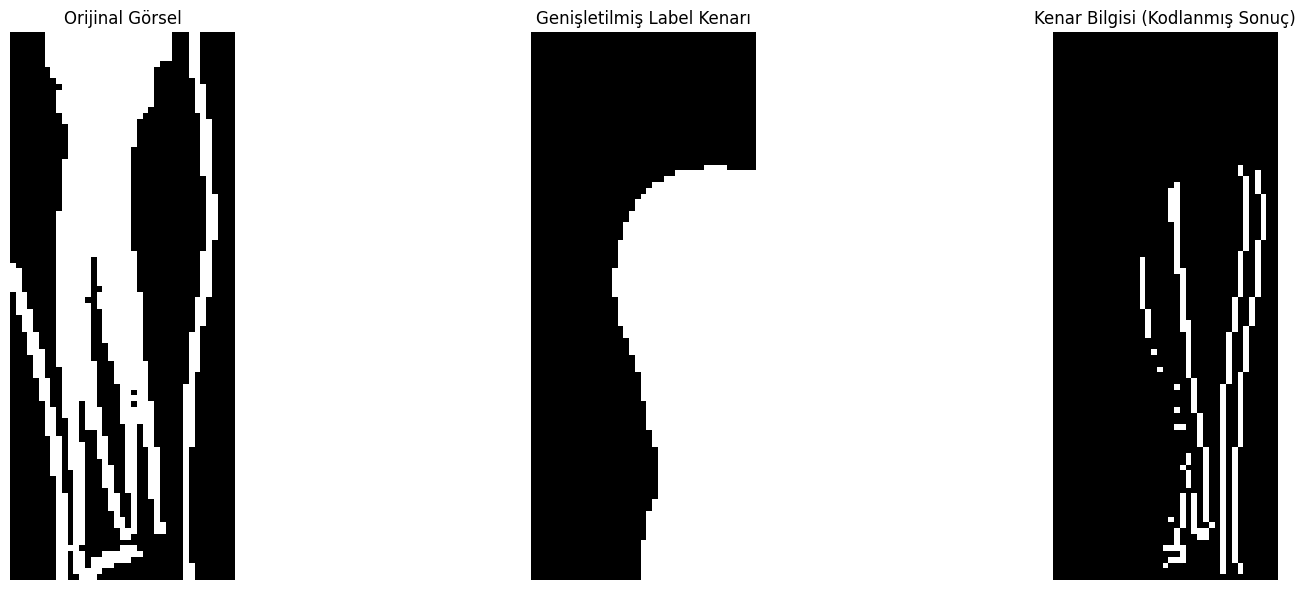

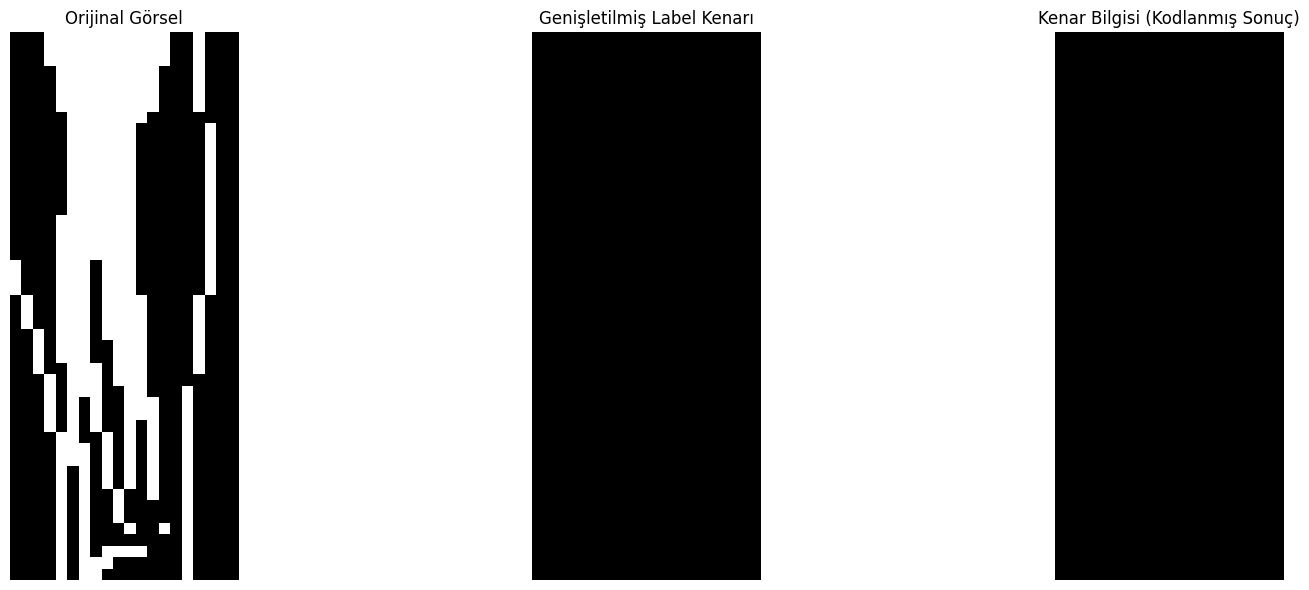

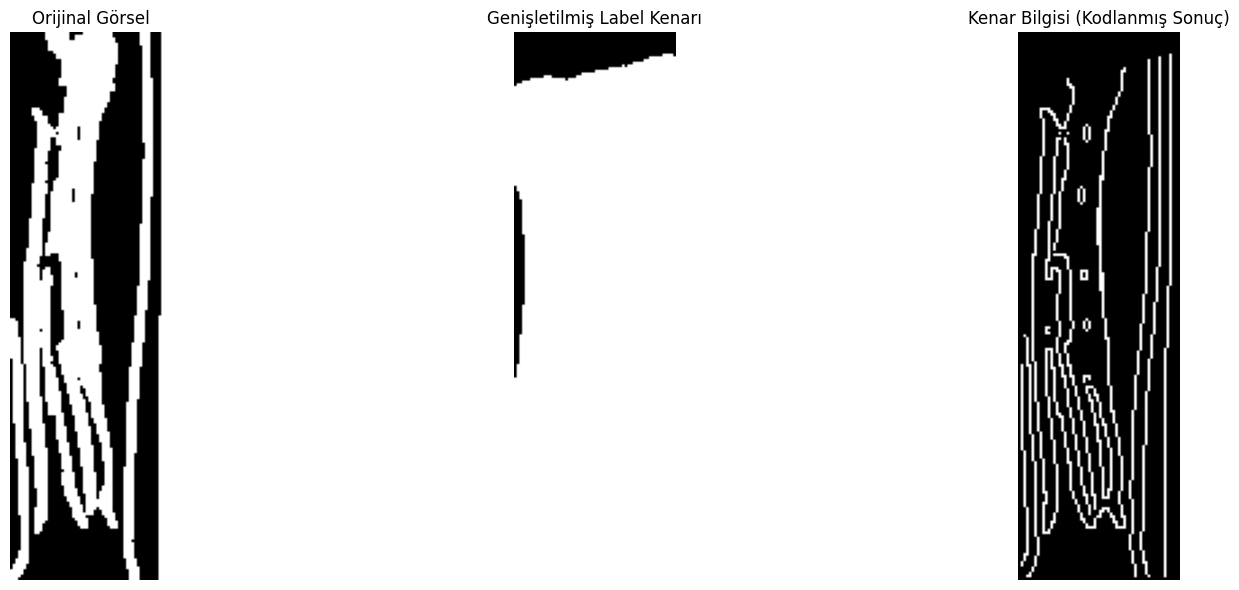

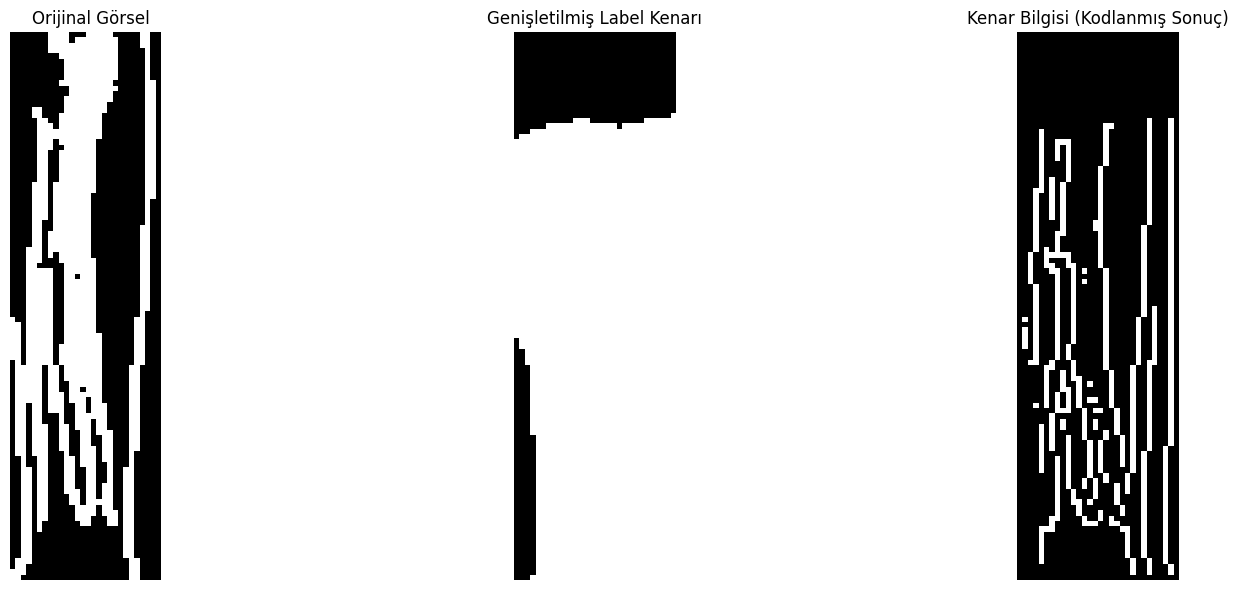

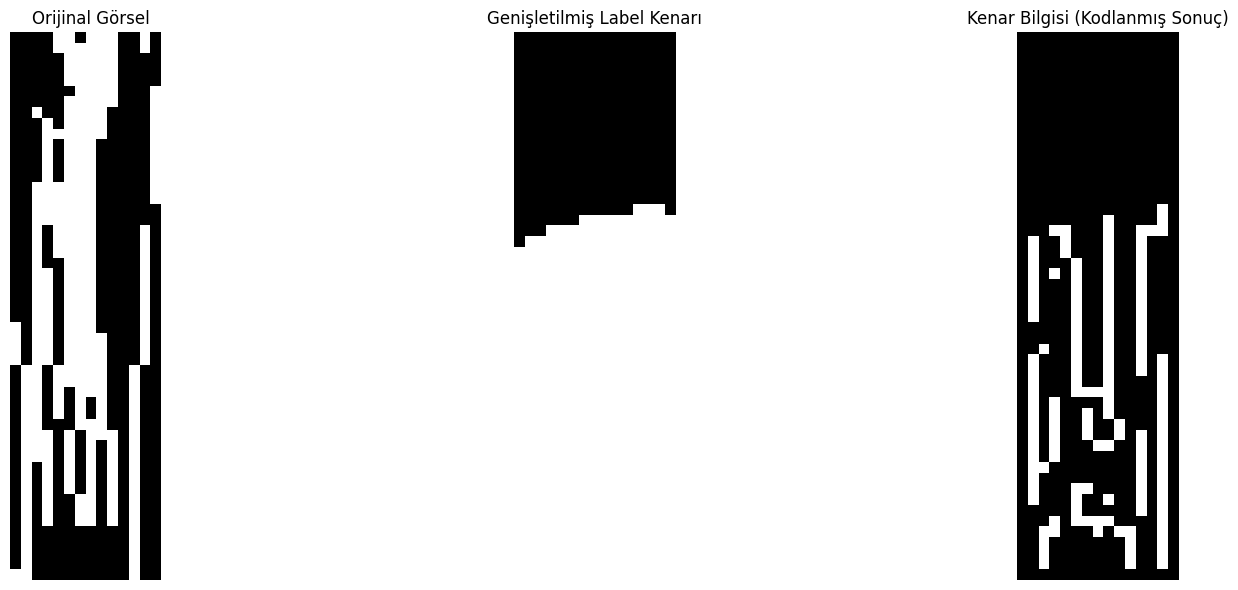

In [57]:
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import measure
from skimage.feature import canny
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.morphology import disk, dilation
from skimage.filters import threshold_otsu

# Parametreler
m = 20  # Patch boyutu (m x m)
k = 15  # Yapısal eleman çapı

# Görsel yolları
image_paths = [
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_0.png",

    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_3.png",

    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_3.png",

    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_3.png"
]

label_paths = [
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",

    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",

    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",

    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png"
]

# Label kenarını genişletme fonksiyonu
def dilate_label(label_edge, radius):
    struct_elem = disk(radius)  # Dairesel yapısal eleman
    dilated_label = dilation(label_edge, struct_elem)
    return dilated_label

# Görsel üzerinde işlem yapma
for image_path, label_path in zip(image_paths, label_paths):
    # Görseli ve etiketi yükle
    image = imread(image_path)
    label = imread(label_path)

    # Görselin kanal sayısını kontrol et
    if image.ndim == 3 and image.shape[2] == 4:  # Eğer 4 kanal (RGBA) ise
        image = image[:, :, :3]  # RGBA'dan RGB'ye geçiş yap
    elif image.ndim == 2:  # Eğer sadece gri tonlamalıysa (tek kanal)
        pass  # Hiçbir şey yapma çünkü zaten gri tonlamalı

    # Görüntüyü gri tonlamaya dönüştürme (sadece RGB ise)
    if image.ndim == 3:  # Eğer 3 kanal (RGB) varsa
        image_gray = rgb2gray(image)
    else:
        image_gray = image  # Zaten gri tonlamalı

    # `label`'i ikili formata dönüştür
    if label.ndim == 3:  # Eğer RGB veya RGBA ise
        if label.shape[2] == 4:  # Eğer RGBA ise
            label = label[:, :, :3]  # Alpha kanalını çıkar
        label_gray = rgb2gray(label)  # Gri tonlamaya çevir
    elif label.ndim == 2:  # Eğer gri tonlamalı ise
        label_gray = label  # Etiket zaten gri tonlamalı

    # Eşikleme ile binary maskeye dönüştür
    threshold = threshold_otsu(label_gray)
    binary_label = label_gray > threshold

    # Canny kenar tespiti
    edges = canny(image_gray)

    # Boyutları eşitle
    min_rows = min(edges.shape[0], binary_label.shape[0])
    min_cols = min(edges.shape[1], binary_label.shape[1])

    edges = edges[:min_rows, :min_cols]
    binary_label = binary_label[:min_rows, :min_cols]

    # Label kenarını genişlet
    dilated_label = dilate_label(binary_label, radius=k)

    # Boyutları tekrar kontrol et ve eşitle
    dilated_label = dilated_label[:edges.shape[0], :edges.shape[1]]

    # Görseli ve sonuçları göster
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
    # Orijinal görsel
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title("Orijinal Görsel")
    ax[0].axis("off")

    # Genişletilmiş label kenarı
    ax[1].imshow(dilated_label, cmap='gray')
    ax[1].set_title("Genişletilmiş Label Kenarı")
    ax[1].axis("off")

    # Orijinal kenarlar ve genişletilmiş label
    combined = np.logical_and(edges, dilated_label)
    ax[2].imshow(combined, cmap='gray')
    ax[2].set_title("Kenar Bilgisi (Kodlanmış Sonuç)")
    ax[2].axis("off")

    # Görselleri göster
    plt.tight_layout()
    plt.show()


Orijinal Görsel: İlk görsel, orijinal MRI veya test görüntüsüdür.

Genişletilmiş Label: İkinci görsel, label üzerindeki genişletme işleminden sonra ortaya çıkan maskeyi gösterir. Burada, orijinal label sınırlarının dışa doğru genişlediğini fark edebilirsiniz.

Kombinasyon (Kenar Kodlama): Üçüncü görsel, genişletilmiş label ile orijinal görselin kenar bilgilerini birleştiren bir çıktıdır. Bu, kenarların genişletilmiş maskeye ne kadar uyumlu olduğunu gösterir.

#### Test: 

Doğruluk oranı: 76.37%


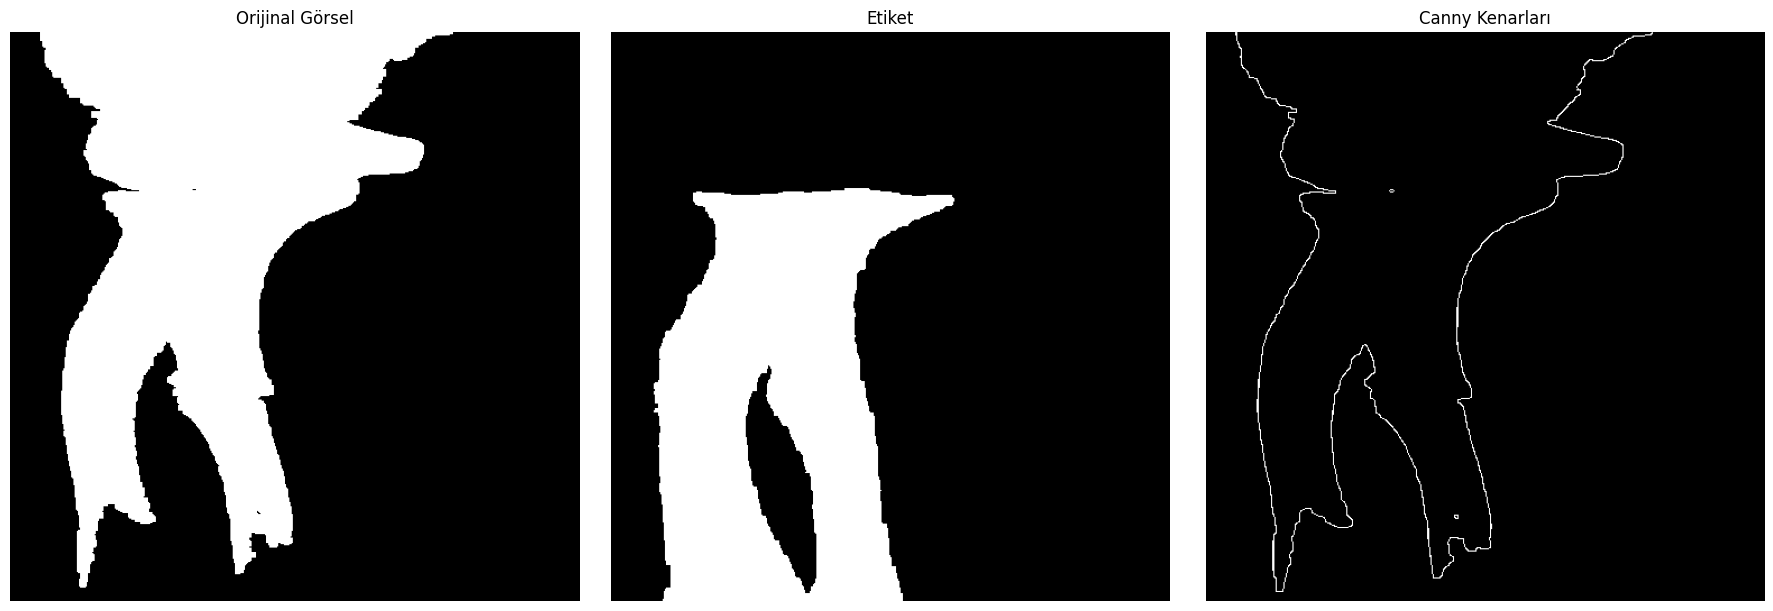

Doğruluk oranı: 69.91%


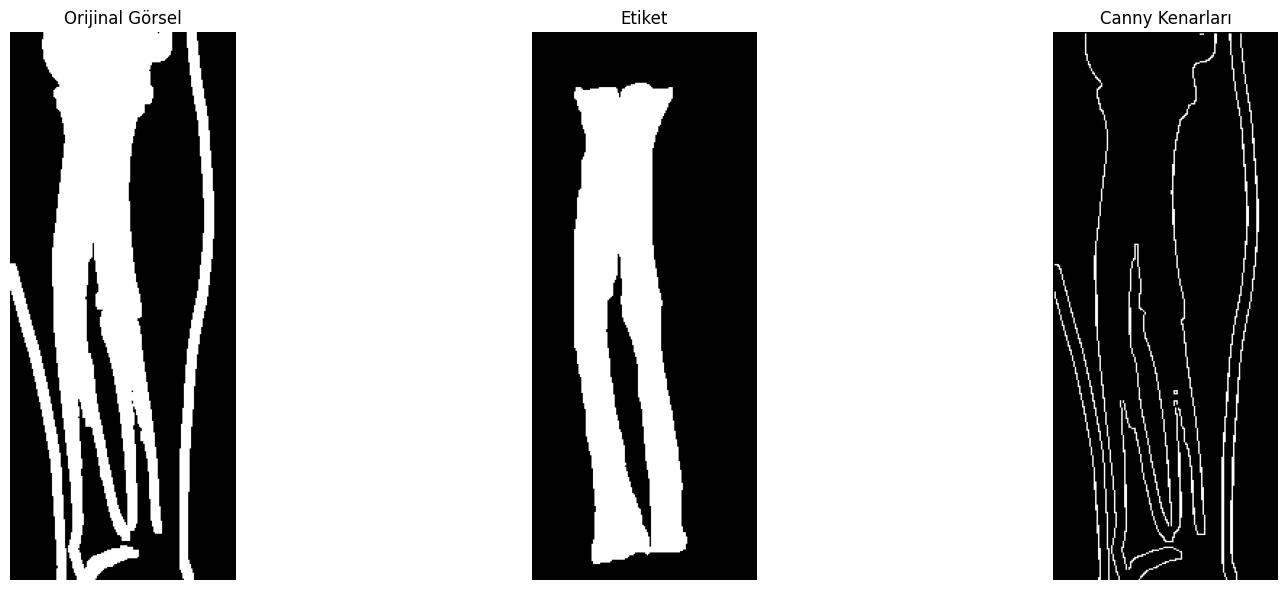

Doğruluk oranı: 61.45%


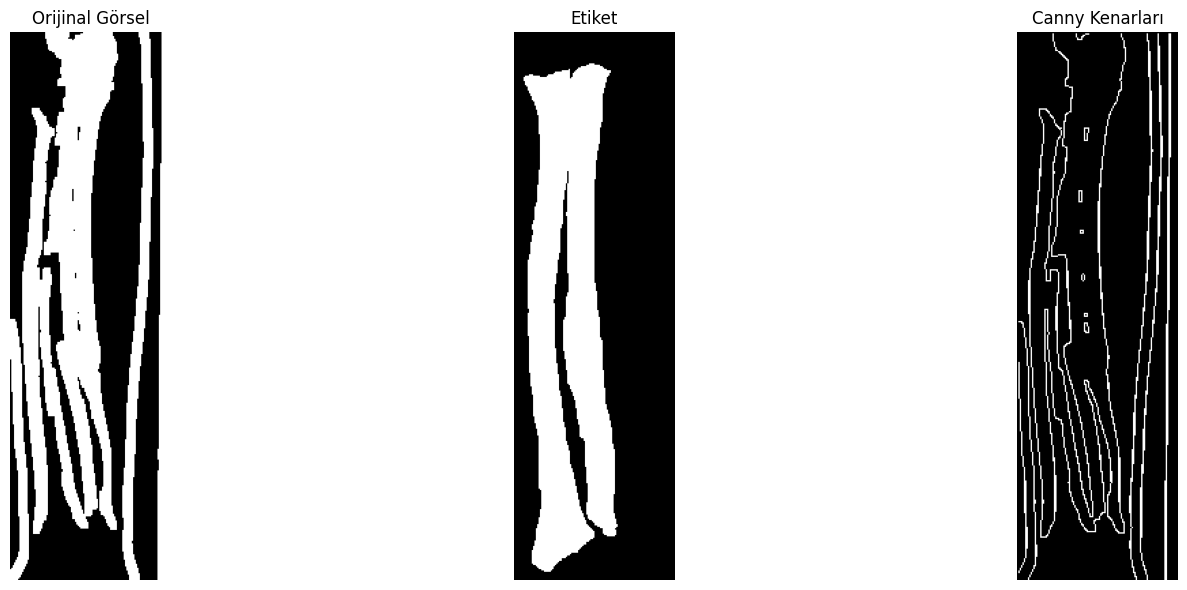

Doğruluk oranı: 72.77%


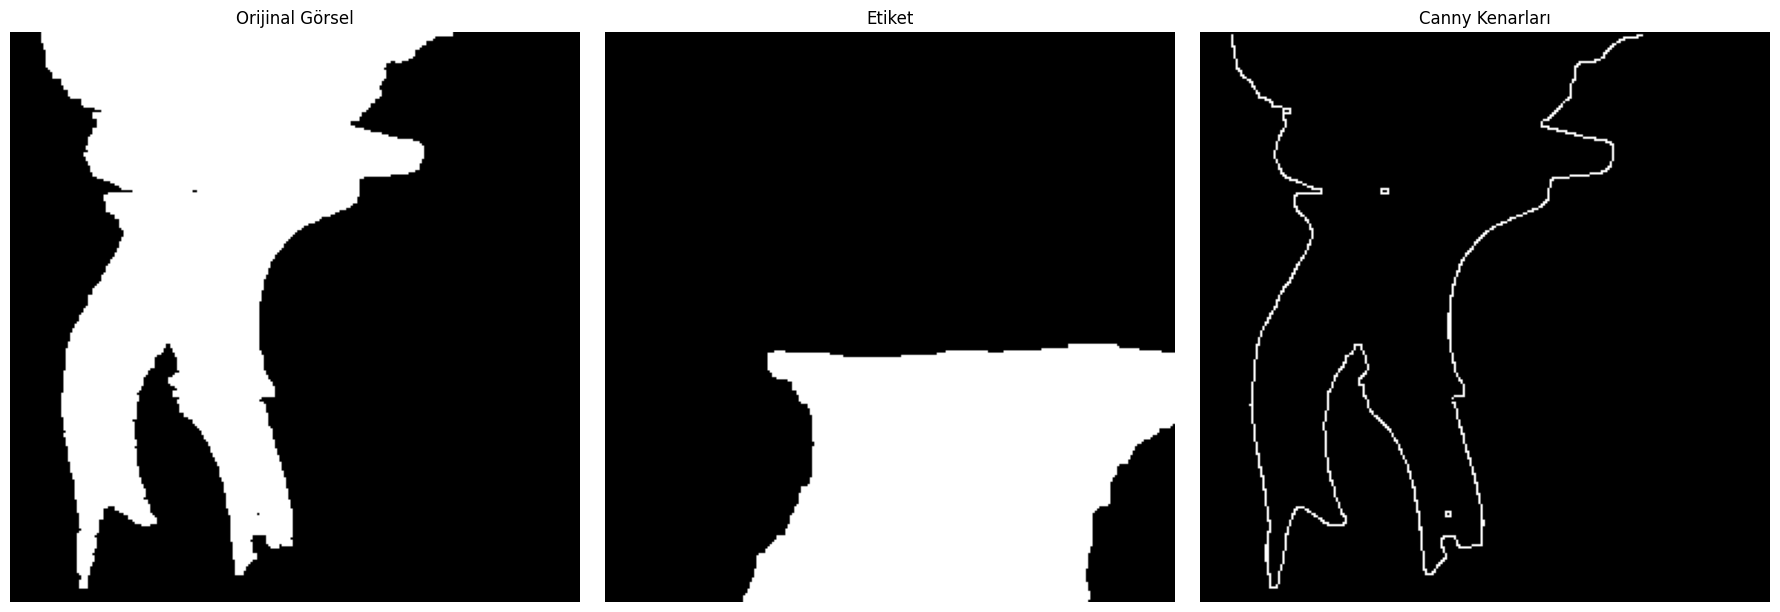

Doğruluk oranı: 96.93%


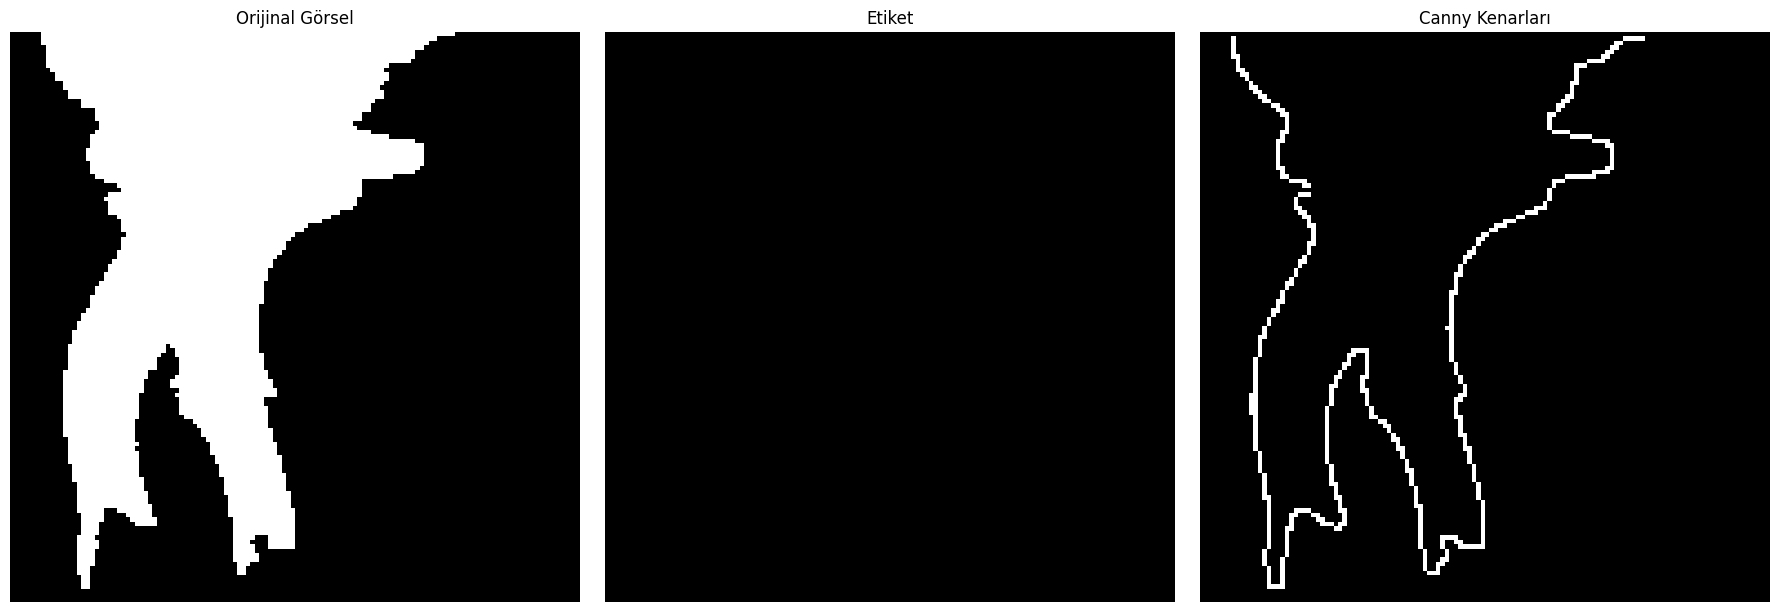

Doğruluk oranı: 94.34%


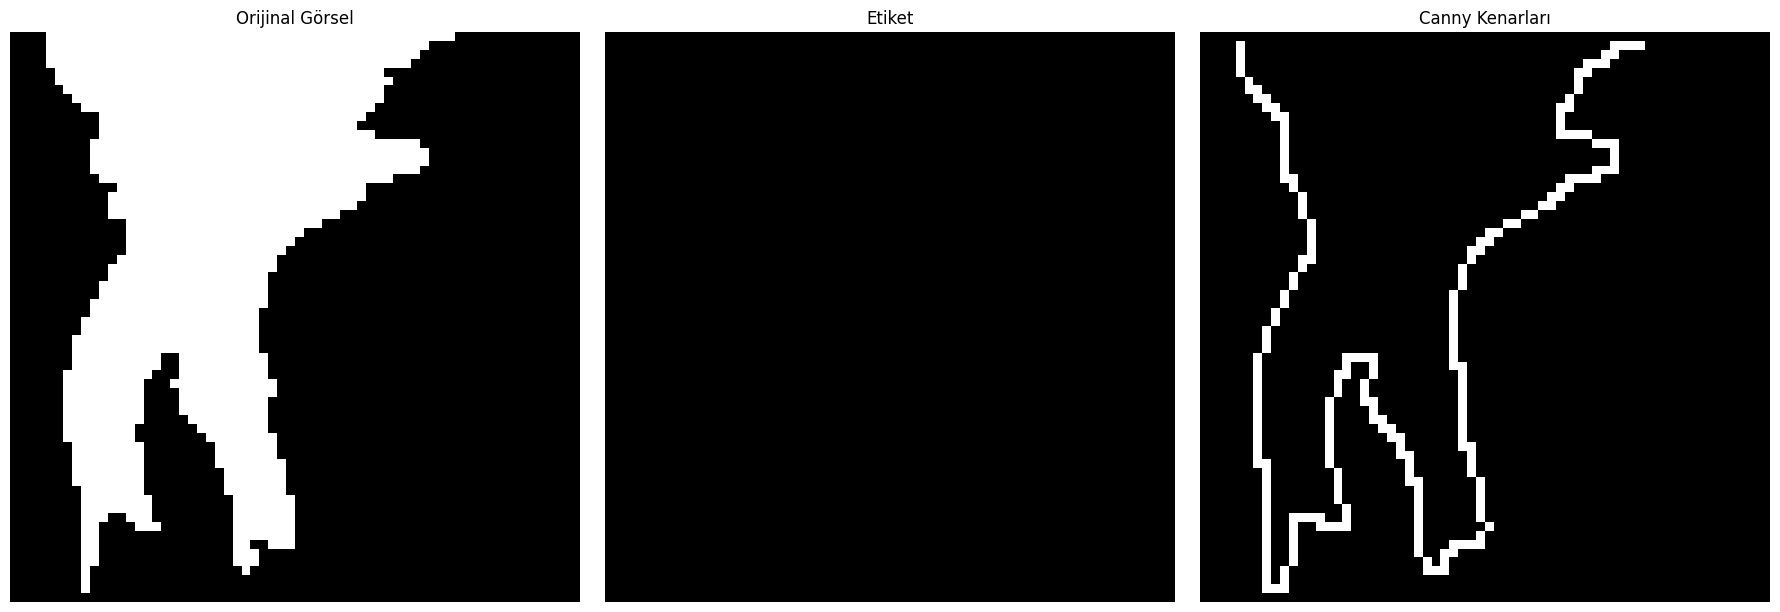

Doğruluk oranı: 53.55%


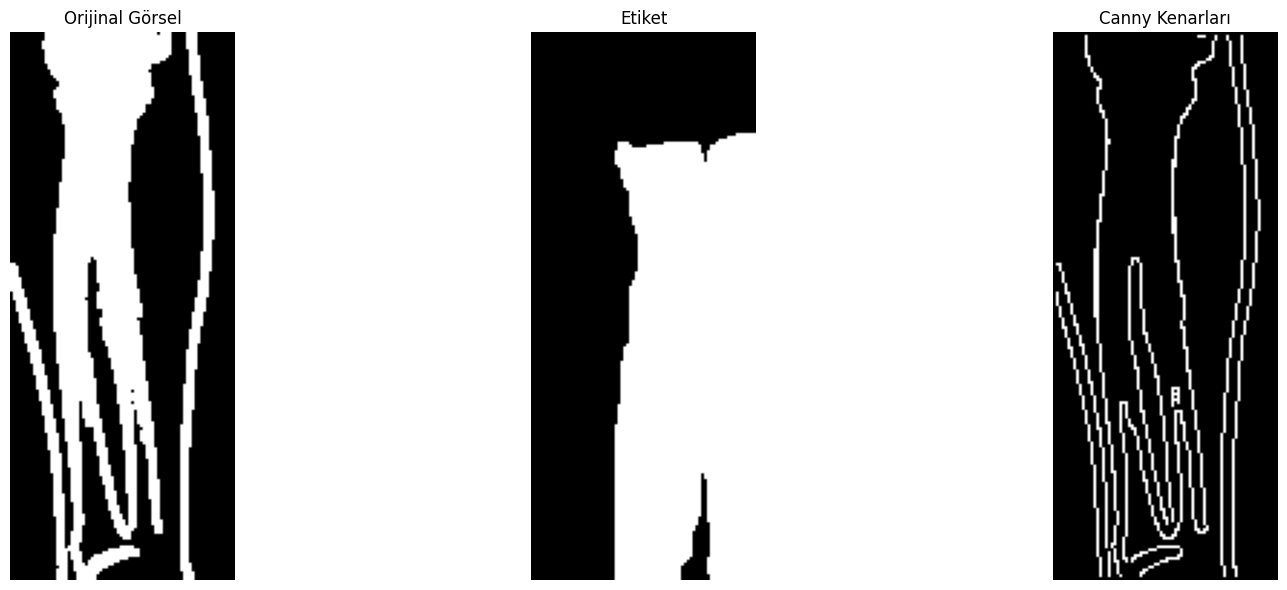

Doğruluk oranı: 76.90%


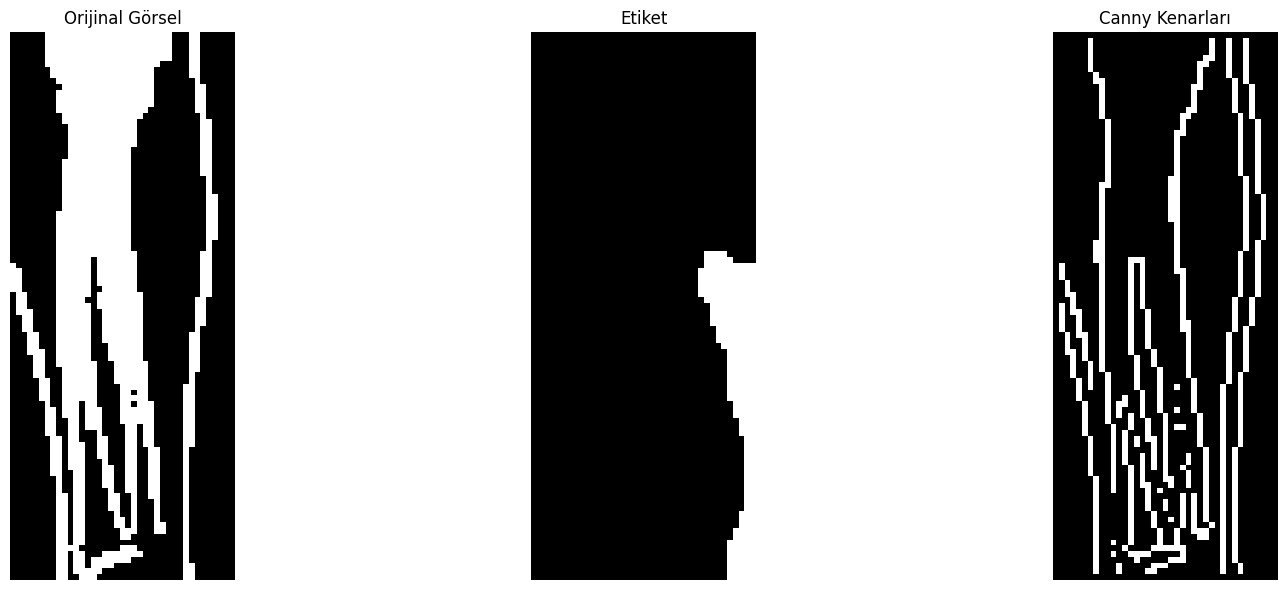

Doğruluk oranı: 74.69%


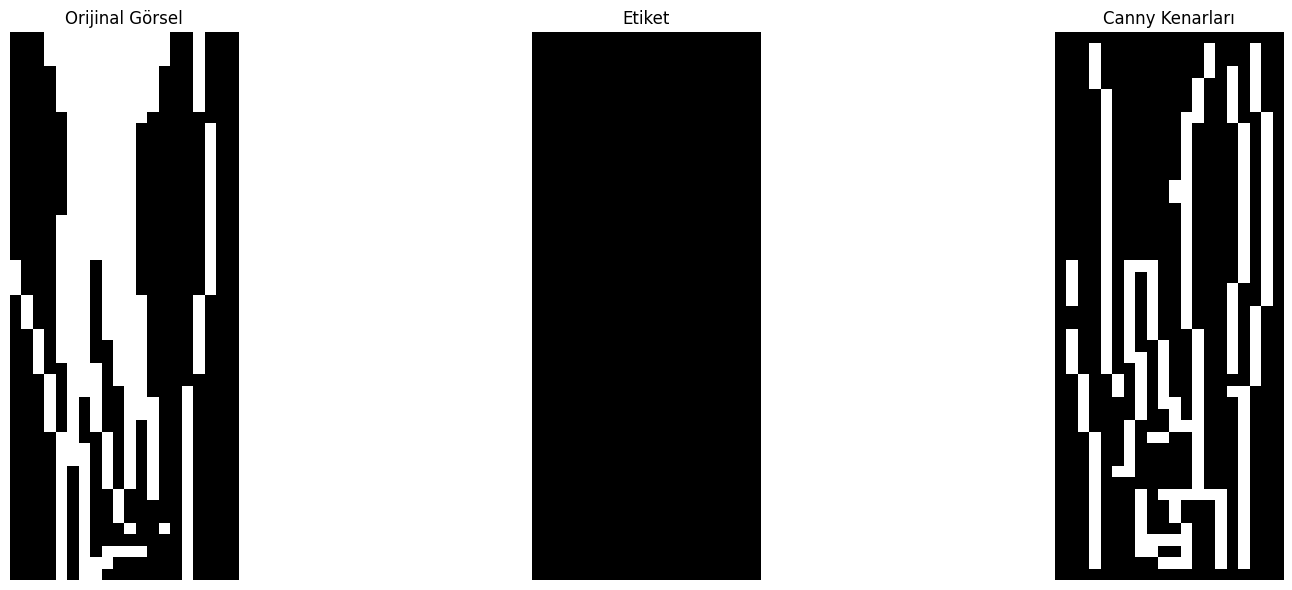

Doğruluk oranı: 42.34%


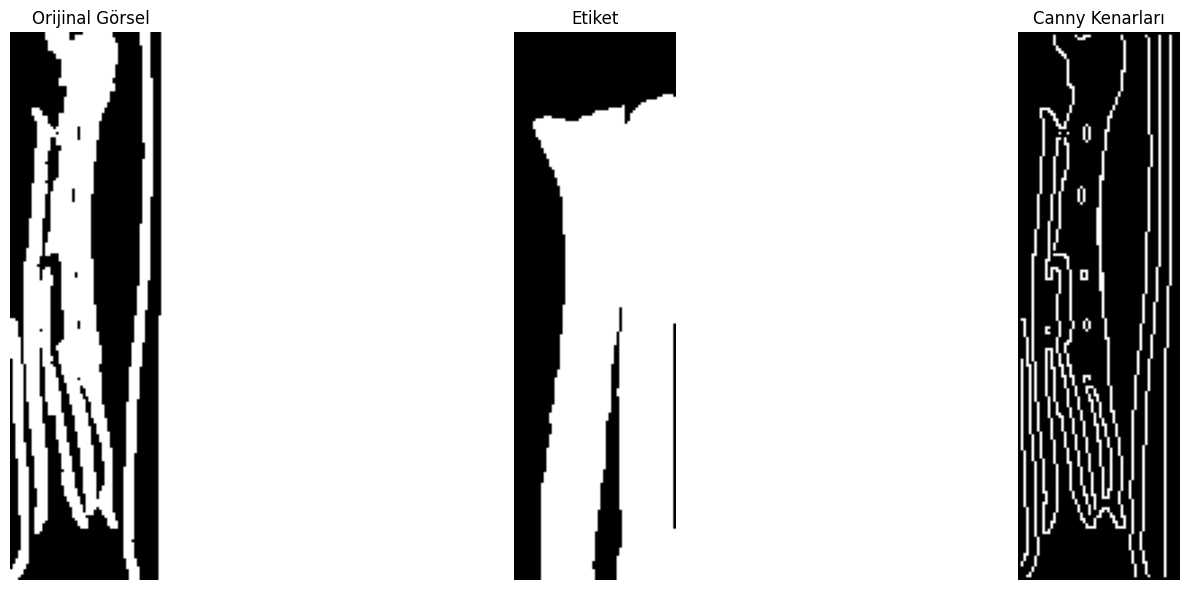

Doğruluk oranı: 60.52%


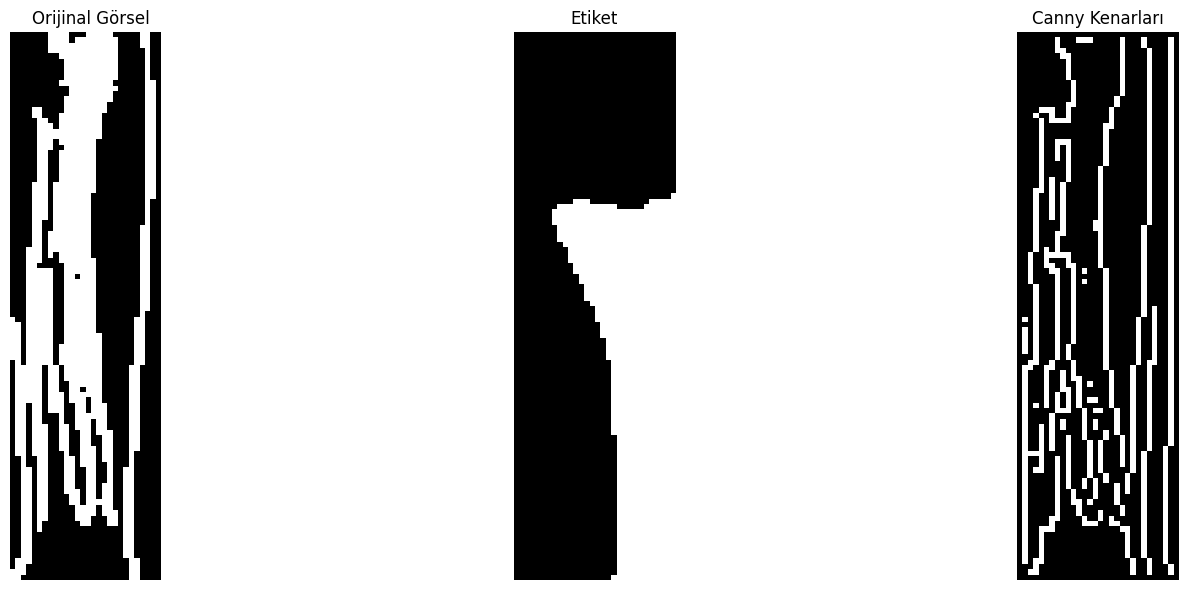

Doğruluk oranı: 70.33%


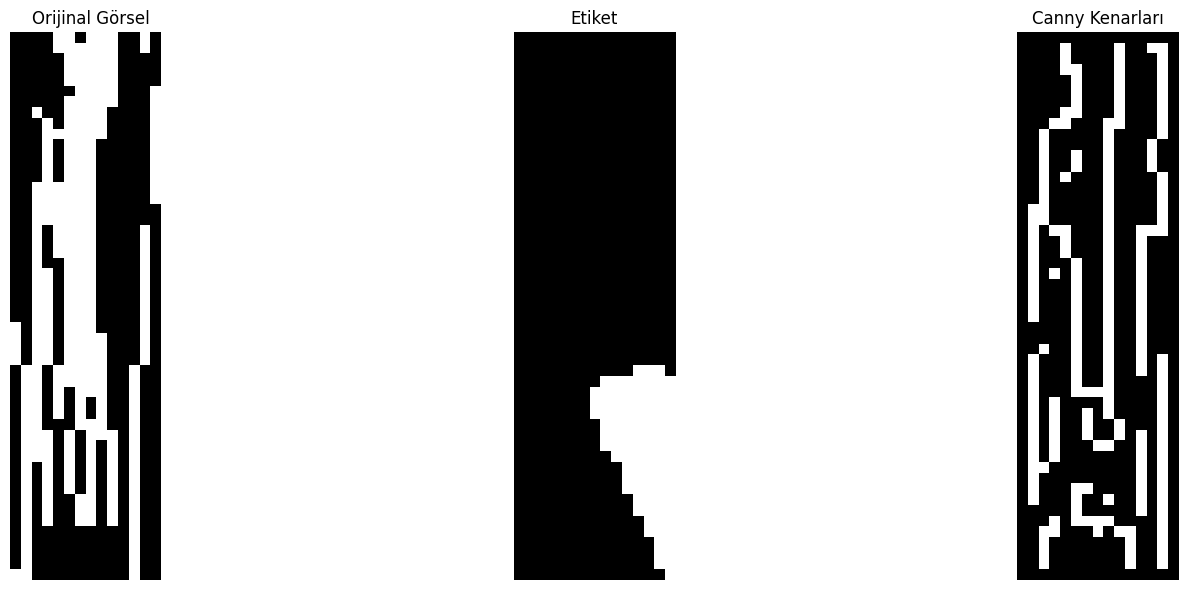

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.morphology import dilation, square

# Yeni görsel ve etiket yolları
image_paths = [
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_0.png",

    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_3.png",

    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_3.png",

    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_3.png"
]

label_paths = [
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",

    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",

    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",

    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png"
]
# Görsel üzerinde işlem yapma
for image_path, label_path in zip(image_paths, label_paths):
    # Görseli ve etiketi yükle
    image = imread(image_path)
    label = imread(label_path)

    # Görselin kanal sayısını kontrol et
    if image.ndim == 3 and image.shape[2] == 4:  # Eğer 4 kanal (RGBA) ise
        image = image[:, :, :3]  # RGBA'dan RGB'ye geçiş yap
    elif image.ndim == 2:  # Eğer sadece gri tonlamalıysa (tek kanal)
        pass  # Hiçbir şey yapma çünkü zaten gri tonlamalı

    # Görüntüyü gri tonlamaya dönüştürme (sadece RGB ise)
    if image.ndim == 3:  # Eğer 3 kanal (RGB) varsa
        image_gray = rgb2gray(image)
    else:
        image_gray = image  # Zaten gri tonlamalı

    # `label`'i ikili formata dönüştür
    if label.ndim == 3:  # Eğer RGB veya RGBA ise
        if label.shape[2] == 4:  # Eğer RGBA ise
            label = label[:, :, :3]  # Alpha kanalını çıkar
        label_gray = rgb2gray(label)  # Gri tonlamaya çevir
    elif label.ndim == 2:  # Eğer gri tonlamalı ise
        label_gray = label  # Etiket zaten gri tonlamalı

    # Eşikleme ile binary maskeye dönüştür
    threshold = threshold_otsu(label_gray)
    binary_label = label_gray > threshold

    # Canny kenar tespiti
    edges = canny(image_gray)

    # Boyutları eşitle
    min_rows = min(edges.shape[0], binary_label.shape[0])
    min_cols = min(edges.shape[1], binary_label.shape[1])

    edges = edges[:min_rows, :min_cols]
    binary_label = binary_label[:min_rows, :min_cols]

    # Doğruluk hesaplama
    # Modelin tahmin ettiği kenarları, etiketle karşılaştıracağız
    # True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN) hesaplaması
    tp = np.sum(np.logical_and(binary_label == 1, edges == 1))  # Gerçek pozitifler
    fp = np.sum(np.logical_and(binary_label == 0, edges == 1))  # Yanlış pozitifler
    tn = np.sum(np.logical_and(binary_label == 0, edges == 0))  # Gerçek negatifler
    fn = np.sum(np.logical_and(binary_label == 1, edges == 0))  # Yanlış negatifler

    accuracy = (tp + tn) / (tp + fp + tn + fn)  # Doğruluk oranı
    print(f"Doğruluk oranı: {accuracy * 100:.2f}%")

    # Görselleri göster (isteğe bağlı)
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
    # Orijinal görsel
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title("Orijinal Görsel")
    ax[0].axis("off")

    # Etiket
    ax[1].imshow(binary_label, cmap='gray')
    ax[1].set_title("Etiket")
    ax[1].axis("off")

    # Canny Kenarları
    ax[2].imshow(edges, cmap='gray')
    ax[2].set_title("Canny Kenarları")
    ax[2].axis("off")

    # Görselleri göster
    plt.tight_layout()
    plt.show()


##### Analiz:

Kırık 6 (Level 0 - 3):
Doğruluk Oranları: 76, 37, 69, 91, 61, 45
Ortalaması: (76 + 37 + 69 + 91 + 61 + 45) / 6 = 62.17%

Kırık 6 Level 1 - 3:
Doğruluk Oranları: 72, 77, 96, 93, 94, 34
Ortalaması: (72 + 77 + 96 + 93 + 94 + 34) / 6 = 69.5%

Kırık 3 Level 1 - 3:
Doğruluk Oranları: 53, 55, 76, 90, 74, 69
Ortalaması: (53 + 55 + 76 + 90 + 74 + 69) / 6 = 69.5%

Kırık 2 Level 1 - 3:
Doğruluk Oranları: 42, 34, 60, 52, 70, 33
Ortalaması: (42 + 34 + 60 + 52 + 70 + 33) / 6 = 48.5%

Kırık 6: Gaussian düzeylerinin artması doğruluk oranını %62.17'den %69.5'e yükseltmiş. Bu, Gaussian Blur işleminin kırık 6 görüntüsünde olumlu bir etkisi olduğunu gösteriyor ve daha iyi sonuçlar elde edilmiş.

Kırık 3: Görüntüde herhangi bir düzey değişikliği olmadan doğruluk oranı %69.5'te sabit kalmış. Bu, Gaussian düzeylerinin kırık 3 görüntüsünde etkili olmadığı anlamına geliyor.

Kırık 2: Kırık 2'de de düzey artışları doğruluk oranını etkilememiş, %48.5'te kalmış. Bu da, kullanılan düzeylerin bu görüntü üzerinde belirgin bir fark yaratmadığını gösteriyor.

Genel Değerlendirme:

Gaussian Etkisi: Kırık 6 görüntüsünde Gaussian düzeylerinin artması doğruluk oranını iyileştirirken, Kırık 3 ve Kırık 2 görüntülerinde bu artış gözlemlenmemiştir. Bu, görüntülerin karmaşıklığı ve Gaussian düzeylerinin görsel yapıyı etkileme gücüne göre değişen sonuçları yansıtmaktadır.
Sonuç: Kırık 6'daki iyileşme, Gaussian düzeylerinin etkisini doğrularken, diğer görüntülerde daha az etkili olduğu görülmektedir.

